<a href="https://colab.research.google.com/github/Navin0062/Traffic-Flow-Prediction/blob/main/Traffic_Flow_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traffic Flow Prediction**

### **Approach**

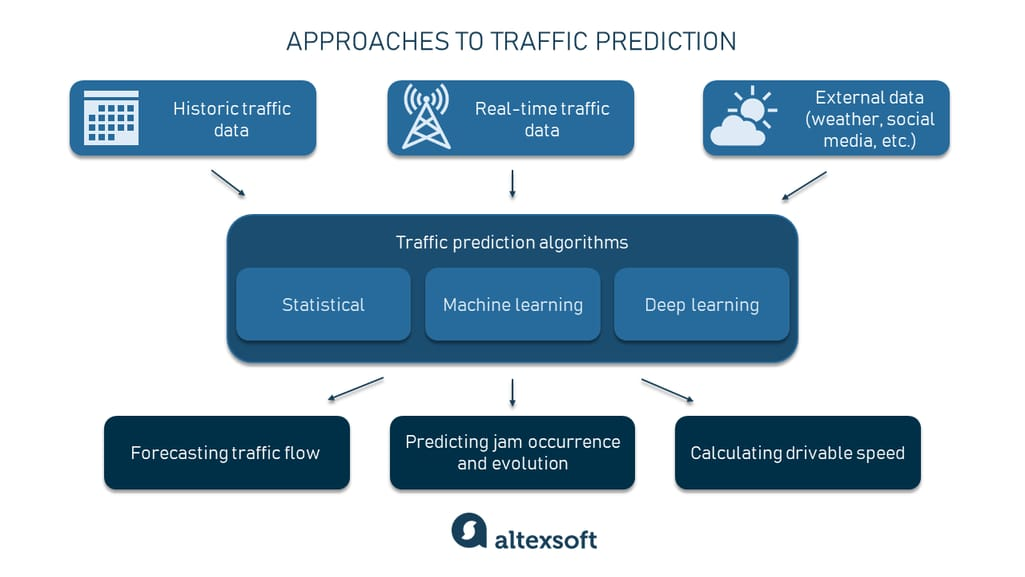

### Algorithms for generating traffic predictions (MODELS):

Traffic prediction entails estimating the speed of vehicles on specific road segments, as well as predicting the likelihood and progression of traffic jams. Let’s explore various methods used for this task.

**Statistical approach :**

Statistical methods allow us to identify traffic trends at different levels, such as by time of day, weekdays, or season. These techniques are typically faster, more cost-effective, and easier to implement than machine learning approaches. However, they tend to be less accurate because they struggle with handling large volumes of multivariate data.

Since the 1970s, Auto-Regressive Integrated Moving Average (ARIMA) models—known for their simplicity and better accuracy compared to other statistical methods—have been widely used for traffic forecasting. This model relies on traditional statistical methods to analyze past data and predict future trends. It collects data from consistent time intervals and assumes that past patterns will repeat. However, due to the complexity of traffic flow, which involves numerous variables, the univariate ARIMA model is limited in effectively processing such data.

**Machine learning approach :**

Machine learning (ML) enables the creation of predictive models that can handle vast amounts of diverse data from multiple sources. Numerous studies have focused on applying ML algorithms for traffic forecasting, yielding some effective examples.

The random forest technique, for instance, constructs multiple decision trees and combines their outputs to deliver accurate predictions. With sufficient training data, it can produce reliable results in a short amount of time. In this case, the model’s input variables might include factors such as weather, time of day, road conditions, road quality, and holidays.

Additionally, the k-nearest neighbors (KNN) algorithm predicts future values based on the similarity of features, making it another useful method for traffic forecasting.

**Deep learning approach :**

Deep learning (DL) methods have proven to be highly effective in predicting road traffic, often surpassing machine learning (ML) and statistical techniques with forecasting accuracies of around 90% or higher. DL algorithms are built on neural networks.

Artificial neural networks (ANN), or simply neural networks (NN), consist of interconnected nodes (neurons) arranged in two or more layers, designed to simulate the human brain's functionality. Various types of neural networks have been developed for specific applications. Here are some that have been employed in traffic analysis and prediction.

Convolutional neural networks (CNNs) are considered pioneers in image analysis and recognition. One of their natural applications in transportation is detecting congestion using images from on-road surveillance cameras. While CNNs are not the first choice for traffic forecasting, attempts to create CNN-based models for predicting traffic network speed have been highly successful. Researchers, for example, created a 2D image matrix using time and space data to characterize traffic flow.

Recurrent neural networks (RNNs), on the other hand, are designed to process time-series data or data collected over specific time intervals, which is ideal for capturing traffic patterns. RNN models have shown remarkable accuracy in predicting congestion progression. However, RNNs face the vanishing gradient problem, meaning they "forget" data from earlier layers, making training more difficult and time-consuming.

Long short-term memory (LSTM) and gated recurrent unit (GRU) models are variations of RNNs developed to address the vanishing gradient issue. Studies comparing their performance have found that the GRU model offers more accurate traffic flow predictions and is easier to train.

Various other types of neural networks have also been recommended for traffic prediction, such as graph neural networks, fuzzy NNs, and Bayesian NNs. Additionally, hybrid approaches that combine two or more algorithms have gained attention. However, no single technique currently exists that can be universally applied to yield the most accurate predictions in all scenarios.

It’s also essential to keep in mind that ML/DL algorithms perform best when provided with large, sufficient datasets for model training and fine-tuning. The more extensive the datasets we can gather, the more accurate the results will be.

## **Comparing the performance of our model with other novel algorithms**

**LSTM:**

Short-term traffic flow prediction plays a crucial role in intelligent transportation systems. Future research could benefit from incorporating more spatial and temporal traffic data to improve predictions across broader road networks. Generally, increasing the number of layers in an LSTM model enhances its learning capability, but this also makes it more prone to overfitting.

**CNN:**

A Convolutional Neural Network (CNN) introduces additional "filtering" layers, where the filter weights are learned during training. While backpropagation still plays a key role in this process, it’s designed to work harder and not just rely on simple adjustments. A CNN utilizes multiple parallel filters, each of which can be fine-tuned to capture different features of interest.

**CNN VS LSTM:**

CNNs can help reduce the number of parameters needed for training while still preserving performance. This is a key advantage of combining signal processing with deep learning. In contrast, while LSTMs require more parameters than CNNs, their strength lies in the ability to analyze long sequences of inputs without increasing the network size.

**LSTM RNN:**

The traditional RNN architecture is affected by the vanishing gradient problem. To address this issue, certain RNN structures, such as LSTM, were developed. LSTMs are designed with memory cells that can decide when to forget specific information, allowing them to determine the optimal time lags for time-series problems. These capabilities are especially beneficial for short-term traffic flow prediction in transportation, given their long-term memory function. Studies using LSTM RNN for traffic flow prediction have demonstrated that they outperform many non-parametric models in terms of performance.

### Data set :

**The Metro Interstate dataset:**

The Interstate Traffic Volume Dataset provides data on the hourly traffic volume for the westbound lane of Interstate-94 (I-94) in the US. It includes weather and temperature reports from 2012 to 2018.

This dataset is valuable for understanding traffic flow patterns on the interstate based on time and date, and it can assist in predicting rush hours, forecasting weather impacts on traffic, and planning expansions of interstates and highways across the US. Additionally, the dataset includes hourly weather features and holiday information, which can further influence traffic volume.

### Deep learning approach (LSTM and RNN) :

The objective of this project is to develop a multi-step RNN model using LSTM to predict traffic volume 2 hours ahead, based on 6 hours of historical data from the dataset.

### Importing important libraries

In [1]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import callbacks
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import *


#for warning
from warnings import filterwarnings
filterwarnings("ignore")

### Reading the Dataset

In [2]:
#df_raw=pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\Metro_Interstate_Traffic_Volume.csv', parse_dates=['date_time'], index_col='date_time')
df_raw=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz", parse_dates=['date_time'], index_col='date_time')
df_raw

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2012-10-02 09:00:00     NaN  288.28      0.0      0.0          40   
2012-10-02 10:00:00     NaN  289.36      0.0      0.0          75   
2012-10-02 11:00:00     NaN  289.58      0.0      0.0          90   
2012-10-02 12:00:00     NaN  290.13      0.0      0.0          90   
2012-10-02 13:00:00     NaN  291.14      0.0      0.0          75   
...                     ...     ...      ...      ...         ...   
2018-09-30 19:00:00     NaN  283.45      0.0      0.0          75   
2018-09-30 20:00:00     NaN  282.76      0.0      0.0          90   
2018-09-30 21:00:00     NaN  282.73      0.0      0.0          90   
2018-09-30 22:00:00     NaN  282.09      0.0      0.0          90   
2018-09-30 23:00:00     NaN  282.12      0.0      0.0          90   

                     weather_main     weather_description  traffic_volume  
date_time                                                                  
2012-10-02 09:00:00        Clouds        scattered clouds            5545  
2012-10-02 10:00:00        Clouds           broken clouds            4516  
2012-10-02 11:00:00        Clouds         overcast clouds            4767  
2012-10-02 12:00:00        Clouds         overcast clouds            5026  
2012-10-02 13:00:00        Clouds           broken clouds            4918  
...                           ...                     ...             ...  
2018-09-30 19:00:00        Clouds           broken clouds            3543  
2018-09-30 20:00:00        Clouds         overcast clouds            2781  
2018-09-30 21:00:00  Thunderstorm  proximity thunderstorm            2159  
2018-09-30 22:00:00        Clouds         overcast clouds            1450  
2018-09-30 23:00:00        Clouds         overcast clouds             954  

[48204 rows x 8 columns]

There are 48,204 total instances, with 9 features:

1. holiday: string (None or name of holiday).
2. temp: in degrees kelvin.
3. rain_1h: in mm for the last hour.
4. snow_1h: in mm for the last hour.
5. clouds: percent.
6. weather_main: short descriptive text.
7. weather_description: longer descriptive. text
8. date_time: in Y/m/d H:M:S format. (FIXED)
9. traffic_volume: # of cars in the last hour.




We will deal with hourly predictions, and the data is expected to be captured at 1 hour intervals:

### Understanding the Data and statistical analysis

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [4]:
def describe(df):
       num_cols = df.select_dtypes(include=np.number).columns  # Select numerical columns
       return pd.concat([df.describe().T, df[num_cols].skew().rename('skew')], axis=1)

describe(df_raw)

count         mean          std  min      25%      50%  \
temp            48204.0   281.205870    13.338232  0.0   272.16   282.45   
rain_1h         48204.0     0.334264    44.789133  0.0     0.00     0.00   
snow_1h         48204.0     0.000222     0.008168  0.0     0.00     0.00   
clouds_all      48204.0    49.362231    39.015750  0.0     1.00    64.00   
traffic_volume  48204.0  3259.818355  1986.860670  0.0  1193.00  3380.00   

                     75%      max        skew  
temp             291.806   310.07   -2.247226  
rain_1h            0.000  9831.30  219.389036  
snow_1h            0.000     0.51   48.367484  
clouds_all        90.000   100.00   -0.197257  
traffic_volume  4933.000  7280.00   -0.089381

### Check for missing values

In [5]:
df_raw.isna().sum()

holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
traffic_volume             0
dtype: int64

No missing values found.

### Data Overview

In [6]:
plot_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all','traffic_volume']

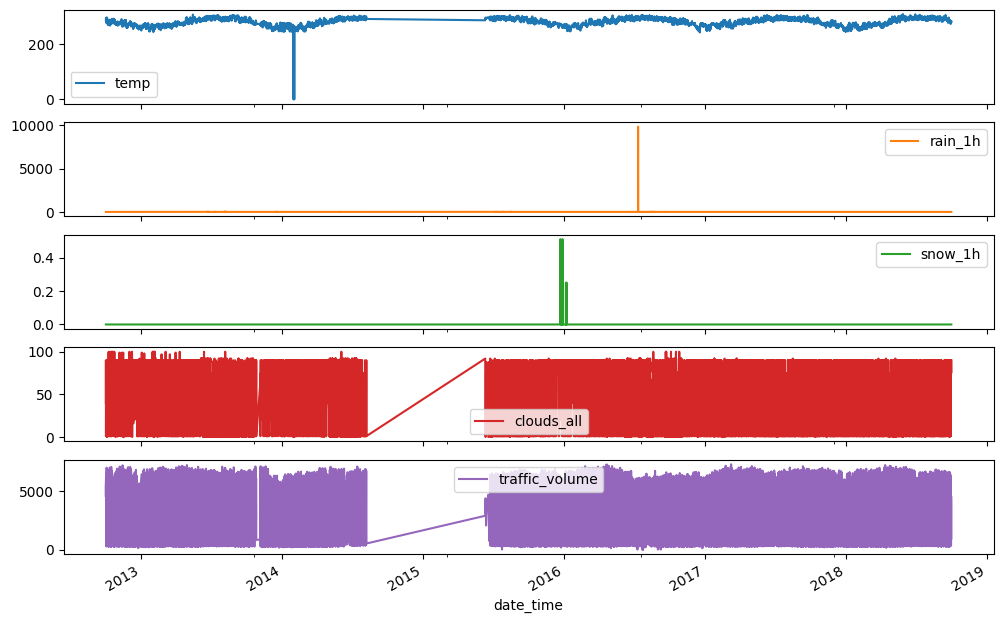

In [7]:
plot_features = df_raw[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

temp  rain_1h  snow_1h  clouds_all  traffic_volume
date_time                                                                
2013-10-01 21:00:00  285.52     0.00      0.0           0            2670
2013-10-01 23:00:00  282.93     0.00      0.0           0            1299
2013-10-02 23:00:00  286.63     2.37      0.0          88             899
2013-10-02 23:00:00  286.63     2.37      0.0          88             899
2013-10-02 23:00:00  286.63     2.37      0.0          88             899
...                     ...      ...      ...         ...             ...
2013-11-30 19:00:00  274.27     0.00      0.0          64            3532
2013-11-30 20:00:00  273.16     0.00      0.0          64            2896
2013-11-30 21:00:00  272.51     0.00      0.0          64            2603
2013-11-30 22:00:00  272.44     0.00      0.0          64            2870
2013-11-30 23:00:00  271.72     0.00      0.0          64            3345

[1032 rows x 5 columns]

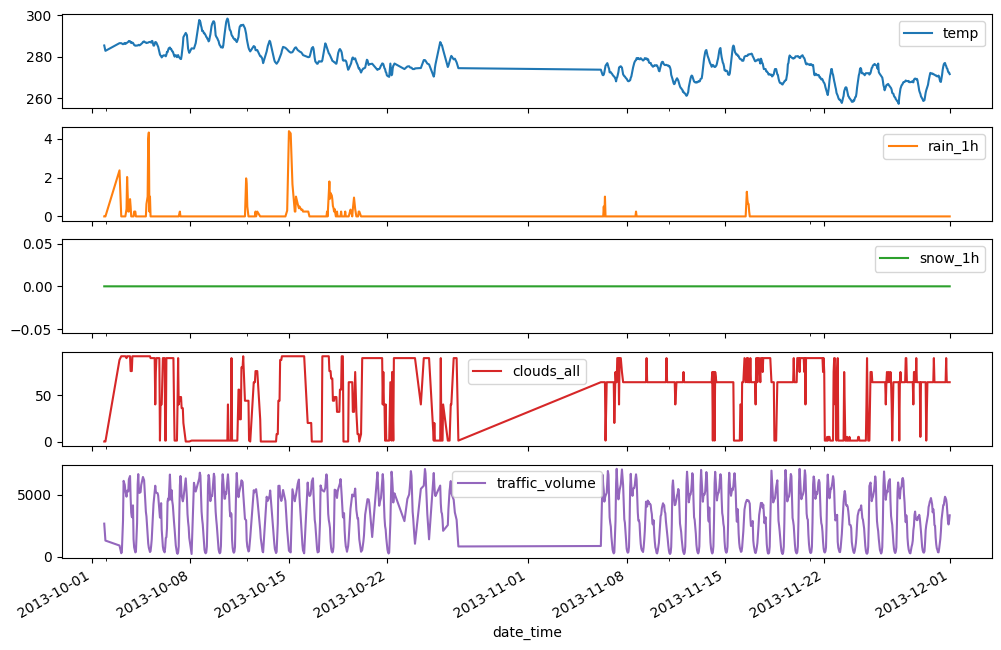

In [8]:
plot_features = df_raw[plot_cols]['2013-10':'2013-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

Data is missing records between 2013-10 and 2013-11

and data is missing records between 2014-08-08 and 2015-06-11

holiday     temp  rain_1h  snow_1h  clouds_all  \
date_time                                                            
2014-08-08 00:00:00     NaN  293.450      0.0      0.0          40   
2014-08-08 01:00:00     NaN  292.380      0.0      0.0           1   
2015-06-11 20:00:00     NaN  287.586      0.0      0.0          92   

                    weather_main weather_description  traffic_volume  
date_time                                                             
2014-08-08 00:00:00       Clouds    scattered clouds             848  
2014-08-08 01:00:00        Clear        sky is clear             516  
2015-06-11 20:00:00         Rain          light rain            2886

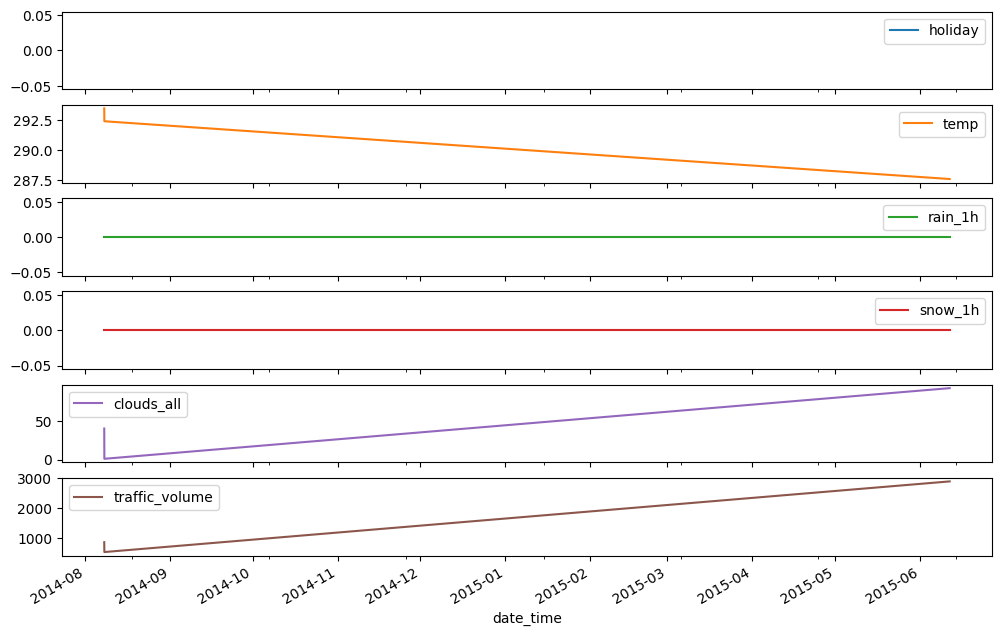

In [9]:
plot_features = df_raw['2014-08-08':'2015-06-11']
display(plot_features)
_ = plot_features.plot(subplots=True, figsize=(12,8))

### Inspect and cleanup

In [10]:
df_raw['date_time_numeric'] = pd.to_numeric(df_raw.index)
df_raw.describe().transpose()

count          mean           std           min  \
temp               48204.0  2.812059e+02  1.333823e+01  0.000000e+00   
rain_1h            48204.0  3.342640e-01  4.478913e+01  0.000000e+00   
snow_1h            48204.0  2.223882e-04  8.167611e-03  0.000000e+00   
clouds_all         48204.0  4.936223e+01  3.901575e+01  0.000000e+00   
traffic_volume     48204.0  3.259818e+03  1.986861e+03  0.000000e+00   
date_time_numeric  48204.0  1.451991e+18  5.900070e+16  1.349168e+18   

                            25%           50%           75%           max  
temp               2.721600e+02  2.824500e+02  2.918060e+02  3.100700e+02  
rain_1h            0.000000e+00  0.000000e+00  0.000000e+00  9.831300e+03  
snow_1h            0.000000e+00  0.000000e+00  0.000000e+00  5.100000e-01  
clouds_all         1.000000e+00  6.400000e+01  9.000000e+01  1.000000e+02  
traffic_volume     1.193000e+03  3.380000e+03  4.933000e+03  7.280000e+03  
date_time_numeric  1.391687e+18  1.465616e+18  1.502431e+18  1.538348e+18

In [11]:
df_raw.describe(include='object').transpose()

count unique           top   freq
holiday                 61     11     Labor Day      7
weather_main         48204     11        Clouds  15164
weather_description  48204     38  sky is clear  11665

### Univariate Analysis

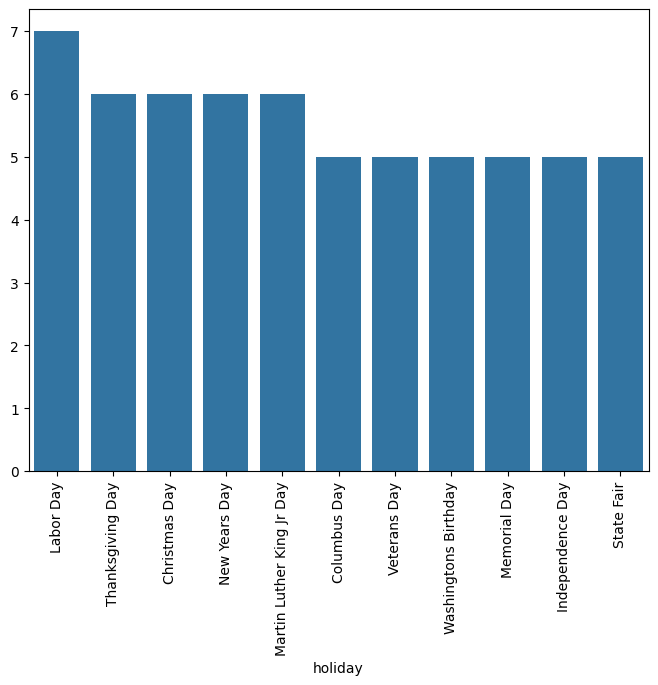

In [12]:
holiday_counts = df_raw['holiday'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=holiday_counts.index, y=holiday_counts.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

Let's see the distribution without the None values

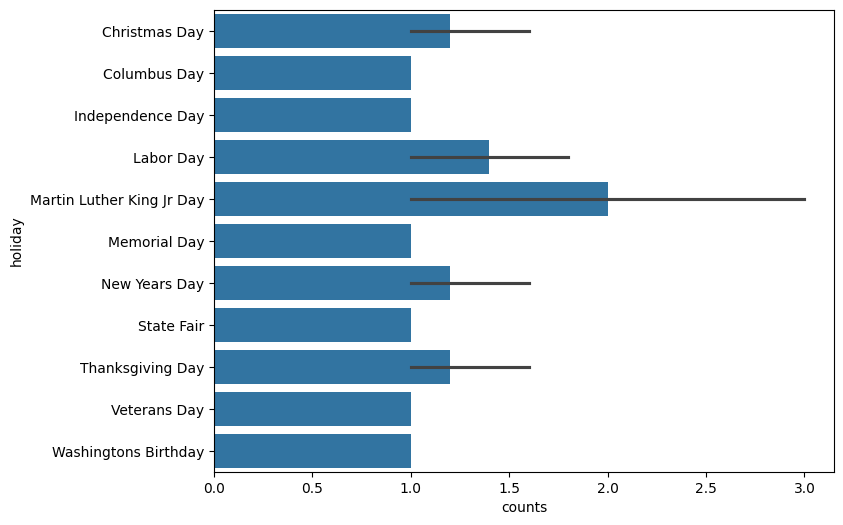

In [13]:
holidays = df_raw.loc[df_raw.holiday != 'None'].copy() # create a copy
holidays['holiday_date'] = holidays.index.date # Extract the date part
# Group by 'holiday' and 'holiday_date' and get the size (count) of each group
holiday_counts = holidays.groupby(['holiday', 'holiday_date']).size().reset_index(name='counts')
# Now plot using the consolidated data
plt.figure(figsize=(8,6))
sns.barplot(y='holiday', x='counts', data=holiday_counts)
plt.show()

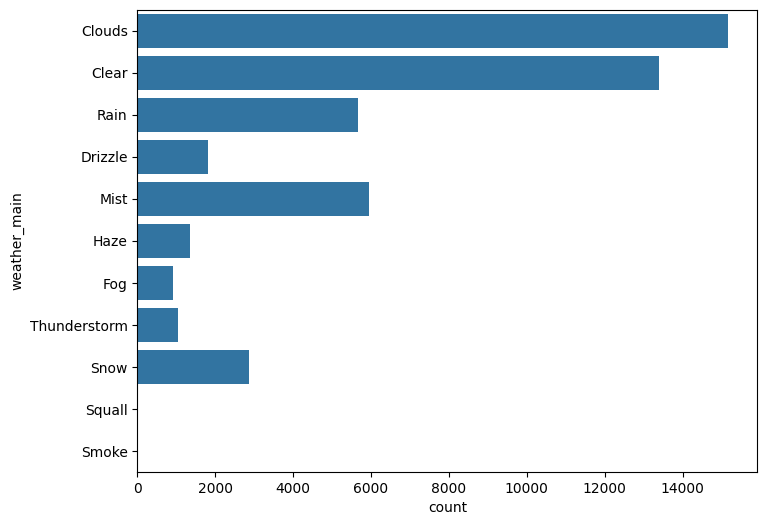

In [14]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_main', data = df_raw)
plt.show()

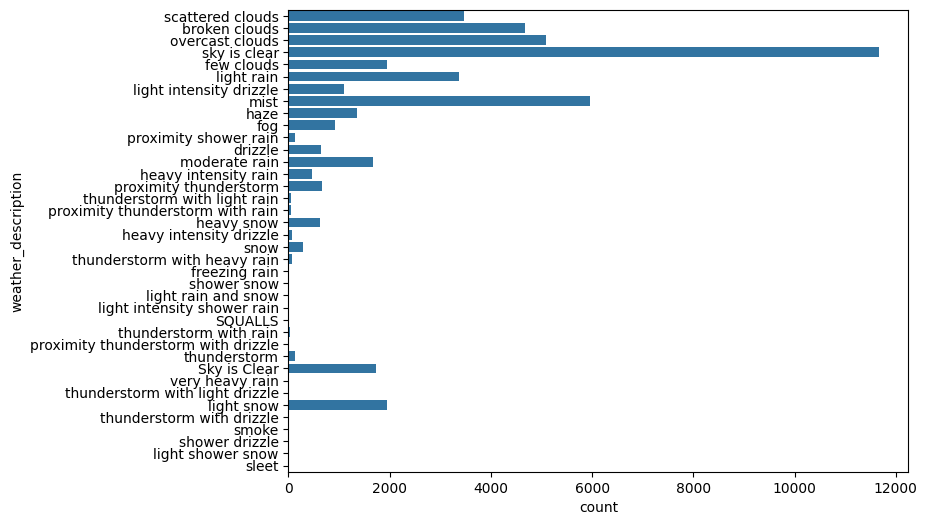

In [15]:
plt.figure(figsize = (8,6))
sns.countplot(y='weather_description', data = df_raw)
plt.show()

### Checking outliers

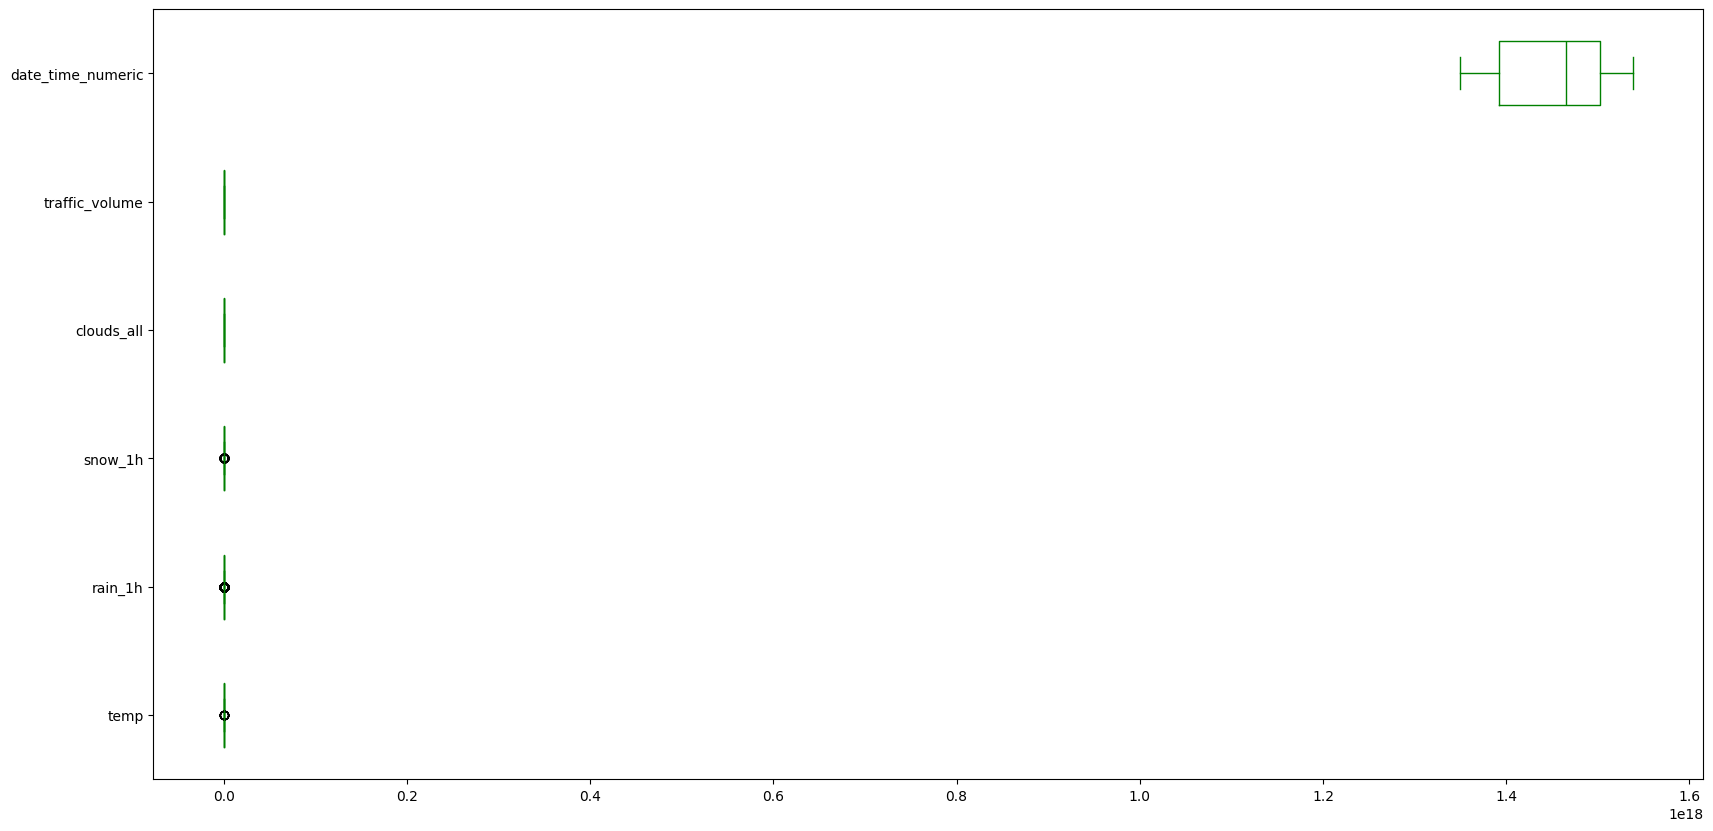

In [16]:
df_raw.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

The following observations were made that we need to take care of:

1. There is no missing data, but that does not mean that there is no inconsistent data.

2. There are temperature records at absolute zero, clearly inconsistent data.

3. rain_1h and snow_1h have many zeros and their distribution is not very well defined, since in rare moments they have high records.

4. Data is missing records between 2013-10 and 2013-11 and data is missing records between 2014-08-08 and 2015-06-11

5. 99.9% of Holiday data is None, and the other data is spread over multiple holidays



### Temperature

Temerature values of 0 seem to be erronoes so we will replace with the mean value of the day. We observe 2 days having erronous values [2014-01-31, 2014-02-02]

In [17]:
df_raw[df_raw.temp == 0]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
date_time                                                                      
2014-01-31 03:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-01-31 04:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-01-31 05:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-01-31 06:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-02-02 03:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-02-02 04:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-02-02 05:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-02-02 06:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-02-02 07:00:00     NaN   0.0      0.0      0.0           0        Clear   
2014-02-02 08:00:00     NaN   0.0      0.0      0.0           0        Clear   

                    weather_description  traffic_volume    date_time_numeric  
date_time                                                                     
2014-01-31 03:00:00        sky is clear             361  1391137200000000000  
2014-01-31 04:00:00        sky is clear             734  1391140800000000000  
2014-01-31 05:00:00        sky is clear            2557  1391144400000000000  
2014-01-31 06:00:00        sky is clear            5150  1391148000000000000  
2014-02-02 03:00:00        sky is clear             291  1391310000000000000  
2014-02-02 04:00:00        sky is clear             284  1391313600000000000  
2014-02-02 05:00:00        sky is clear             434  1391317200000000000  
2014-02-02 06:00:00        sky is clear             739  1391320800000000000  
2014-02-02 07:00:00        sky is clear             962  1391324400000000000  
2014-02-02 08:00:00        sky is clear            1670  1391328000000000000

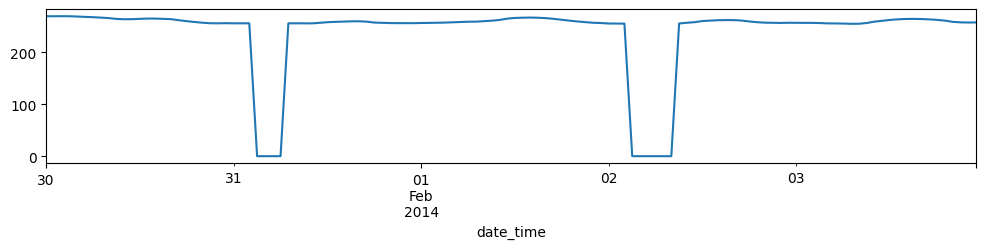

In [18]:
plot_features = df_raw['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

In [19]:
df_raw.loc['2014-01-31']  # Access data for a single date

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2014-01-31 00:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 01:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 02:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 03:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 04:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 05:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 06:00:00     NaN    0.00     0.00      0.0           0   
2014-01-31 07:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 08:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 09:00:00     NaN  255.93     0.00      0.0           0   
2014-01-31 10:00:00     NaN  255.84     0.00      0.0           0   
2014-01-31 11:00:00     NaN  256.88     0.00      0.0           0   
2014-01-31 12:00:00     NaN  258.10     0.00      0.0           0   
2014-01-31 13:00:00     NaN  258.80     0.25      0.0           0   
2014-01-31 14:00:00     NaN  259.22     0.25      0.0           0   
2014-01-31 15:00:00     NaN  259.80     0.00      0.0           0   
2014-01-31 16:00:00     NaN  259.86     0.00      0.0           0   
2014-01-31 17:00:00     NaN  259.24     0.00      0.0           0   
2014-01-31 18:00:00     NaN  257.37     0.00      0.0           0   
2014-01-31 19:00:00     NaN  256.88     0.00      0.0           0   
2014-01-31 20:00:00     NaN  256.45     0.00      0.0           0   
2014-01-31 21:00:00     NaN  256.27     0.00      0.0           0   
2014-01-31 22:00:00     NaN  256.30     0.00      0.0           0   
2014-01-31 23:00:00     NaN  256.21     0.00      0.0           0   

                    weather_main weather_description  traffic_volume  \
date_time                                                              
2014-01-31 00:00:00        Clear        sky is clear             644   
2014-01-31 01:00:00        Clear        sky is clear             390   
2014-01-31 02:00:00        Clear        sky is clear             313   
2014-01-31 03:00:00        Clear        sky is clear             361   
2014-01-31 04:00:00        Clear        sky is clear             734   
2014-01-31 05:00:00        Clear        sky is clear            2557   
2014-01-31 06:00:00        Clear        sky is clear            5150   
2014-01-31 07:00:00        Clear        sky is clear            5363   
2014-01-31 08:00:00        Clear        sky is clear            5269   
2014-01-31 09:00:00        Clear        sky is clear            4721   
2014-01-31 10:00:00        Clear        sky is clear            4548   
2014-01-31 11:00:00        Clear        sky is clear            4852   
2014-01-31 12:00:00        Clear        sky is clear            5010   
2014-01-31 13:00:00         Rain          light rain            5043   
2014-01-31 14:00:00         Rain          light rain            5524   
2014-01-31 15:00:00        Clear        sky is clear            5713   
2014-01-31 16:00:00        Clear        sky is clear            5979   
2014-01-31 17:00:00        Clear        sky is clear            5724   
2014-01-31 18:00:00        Clear        sky is clear            5115   
2014-01-31 19:00:00        Clear        sky is clear            3951   
2014-01-31 20:00:00        Clear        sky is clear            2930   
2014-01-31 21:00:00        Clear        sky is clear            2791   
2014-01-31 22:00:00        Clear        sky is clear            2964   
2014-01-31 23:00:00        Clear        sky is clear            1684   

                       date_time_numeric  
date_time                                 
2014-01-31 00:00:00  1391126400000000000  
2014-01-31 01:00:00  1391130000000000000  
2014-01-31 02:00:00  1391133600000000000  
2014-01-31 03:00:00  1391137200000000000  
2014-01-31 04:00:00  1391140800000000000  
2014-01-31 05:00:00  1391144400000000000  
2014-01-

In [20]:
df_raw.loc['2014-02-02']

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2014-02-02 00:00:00     NaN  255.59      0.0      0.0           0   
2014-02-02 01:00:00     NaN  255.48      0.0      0.0           0   
2014-02-02 02:00:00     NaN  255.37      0.0      0.0           0   
2014-02-02 03:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 04:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 05:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 06:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 07:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 08:00:00     NaN    0.00      0.0      0.0           0   
2014-02-02 09:00:00     NaN  255.62      0.0      0.0           0   
2014-02-02 10:00:00     NaN  257.04      0.0      0.0           0   
2014-02-02 11:00:00     NaN  258.17      0.0      0.0           0   
2014-02-02 12:00:00     NaN  260.39      0.0      0.0           0   
2014-02-02 13:00:00     NaN  261.19      0.0      0.0           1   
2014-02-02 14:00:00     NaN  261.96      0.0      0.0           1   
2014-02-02 15:00:00     NaN  262.21      0.0      0.0           1   
2014-02-02 16:00:00     NaN  262.12      0.0      0.0           1   
2014-02-02 17:00:00     NaN  261.26      0.0      0.0           1   
2014-02-02 18:00:00     NaN  259.50      0.0      0.0           1   
2014-02-02 19:00:00     NaN  258.06      0.0      0.0           1   
2014-02-02 20:00:00     NaN  257.20      0.0      0.0           1   
2014-02-02 21:00:00     NaN  256.97      0.0      0.0           1   
2014-02-02 22:00:00     NaN  256.66      0.0      0.0           1   
2014-02-02 23:00:00     NaN  257.00      0.0      0.0           1   

                    weather_main weather_description  traffic_volume  \
date_time                                                              
2014-02-02 00:00:00        Clear        sky is clear            1143   
2014-02-02 01:00:00        Clear        sky is clear             695   
2014-02-02 02:00:00        Clear        sky is clear             539   
2014-02-02 03:00:00        Clear        sky is clear             291   
2014-02-02 04:00:00        Clear        sky is clear             284   
2014-02-02 05:00:00        Clear        sky is clear             434   
2014-02-02 06:00:00        Clear        sky is clear             739   
2014-02-02 07:00:00        Clear        sky is clear             962   
2014-02-02 08:00:00        Clear        sky is clear            1670   
2014-02-02 09:00:00        Clear        sky is clear            2506   
2014-02-02 10:00:00        Clear        sky is clear            3114   
2014-02-02 11:00:00        Clear        sky is clear            3306   
2014-02-02 12:00:00        Clear        sky is clear            3655   
2014-02-02 13:00:00        Clear        sky is clear            3795   
2014-02-02 14:00:00        Clear        sky is clear            3944   
2014-02-02 15:00:00        Clear        sky is clear            3959   
2014-02-02 16:00:00        Clear        sky is clear            4295   
2014-02-02 17:00:00        Clear        sky is clear            3567   
2014-02-02 18:00:00        Clear        sky is clear            2185   
2014-02-02 19:00:00        Clear        sky is clear            1801   
2014-02-02 20:00:00        Clear        sky is clear            1748   
2014-02-02 21:00:00        Clear        sky is clear            2891   
2014-02-02 22:00:00        Clear        sky is clear            1721   
2014-02-02 23:00:00        Clear        sky is clear             942   

                       date_time_numeric  
date_time                                 
2014-02-02 00:00:00  1391299200000000000  
2014-02-02 01:00:00  1391302800000000000  
2014-02-02 02:00:00  1391306400000000000  
2014-02-02 03:00:00  1391310000000000000  
2014-02-02 04:00:00  1391313600000000000  
2014-02-02 05:00:00  1391317200000000000  
2014-02-

In [21]:
day_1 = df_raw.index.date == datetime.date(2014, 1, 31)
day_2 = df_raw.index.date == datetime.date(2014, 2, 2)
bad_temps = df_raw['temp'] == 0

df_1 = df_raw.copy()
# Set the zeros to NaN to be excluded from the mean
df_1.loc[bad_temps,'temp'] = np.nan
df_1[bad_temps]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
date_time                                                                      
2014-01-31 03:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-01-31 04:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-01-31 05:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-01-31 06:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 03:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 04:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 05:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 06:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 07:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 08:00:00     NaN   NaN      0.0      0.0           0        Clear   

                    weather_description  traffic_volume    date_time_numeric  
date_time                                                                     
2014-01-31 03:00:00        sky is clear             361  1391137200000000000  
2014-01-31 04:00:00        sky is clear             734  1391140800000000000  
2014-01-31 05:00:00        sky is clear            2557  1391144400000000000  
2014-01-31 06:00:00        sky is clear            5150  1391148000000000000  
2014-02-02 03:00:00        sky is clear             291  1391310000000000000  
2014-02-02 04:00:00        sky is clear             284  1391313600000000000  
2014-02-02 05:00:00        sky is clear             434  1391317200000000000  
2014-02-02 06:00:00        sky is clear             739  1391320800000000000  
2014-02-02 07:00:00        sky is clear             962  1391324400000000000  
2014-02-02 08:00:00        sky is clear            1670  1391328000000000000

In [22]:
# The means to be used for each day
print(df_1[day_1].temp.mean())
print(df_1[day_2].temp.mean())

257.14
258.4327777777778


In [23]:
df_1[bad_temps & day_1]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
date_time                                                                      
2014-01-31 03:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-01-31 04:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-01-31 05:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-01-31 06:00:00     NaN   NaN      0.0      0.0           0        Clear   

                    weather_description  traffic_volume    date_time_numeric  
date_time                                                                     
2014-01-31 03:00:00        sky is clear             361  1391137200000000000  
2014-01-31 04:00:00        sky is clear             734  1391140800000000000  
2014-01-31 05:00:00        sky is clear            2557  1391144400000000000  
2014-01-31 06:00:00        sky is clear            5150  1391148000000000000

In [24]:
df_1[bad_temps & day_2]

holiday  temp  rain_1h  snow_1h  clouds_all weather_main  \
date_time                                                                      
2014-02-02 03:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 04:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 05:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 06:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 07:00:00     NaN   NaN      0.0      0.0           0        Clear   
2014-02-02 08:00:00     NaN   NaN      0.0      0.0           0        Clear   

                    weather_description  traffic_volume    date_time_numeric  
date_time                                                                     
2014-02-02 03:00:00        sky is clear             291  1391310000000000000  
2014-02-02 04:00:00        sky is clear             284  1391313600000000000  
2014-02-02 05:00:00        sky is clear             434  1391317200000000000  
2014-02-02 06:00:00        sky is clear             739  1391320800000000000  
2014-02-02 07:00:00        sky is clear             962  1391324400000000000  
2014-02-02 08:00:00        sky is clear            1670  1391328000000000000

Set the bad temp values to the mean of the day that it occured on

In [25]:
# Set day 1 values
df_1.loc[bad_temps & day_1, 'temp'] = df_1[day_1].temp.mean()
df_1.loc[bad_temps & day_1]

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2014-01-31 03:00:00     NaN  257.14      0.0      0.0           0   
2014-01-31 04:00:00     NaN  257.14      0.0      0.0           0   
2014-01-31 05:00:00     NaN  257.14      0.0      0.0           0   
2014-01-31 06:00:00     NaN  257.14      0.0      0.0           0   

                    weather_main weather_description  traffic_volume  \
date_time                                                              
2014-01-31 03:00:00        Clear        sky is clear             361   
2014-01-31 04:00:00        Clear        sky is clear             734   
2014-01-31 05:00:00        Clear        sky is clear            2557   
2014-01-31 06:00:00        Clear        sky is clear            5150   

                       date_time_numeric  
date_time                                 
2014-01-31 03:00:00  1391137200000000000  
2014-01-31 04:00:00  1391140800000000000  
2014-01-31 05:00:00  1391144400000000000  
2014-01-31 06:00:00  1391148000000000000

In [26]:
# Set day 2 values
df_1.loc[bad_temps & day_2, 'temp'] = df_1[day_2].temp.mean()
df_1.loc[bad_temps & day_2]

holiday        temp  rain_1h  snow_1h  clouds_all  \
date_time                                                               
2014-02-02 03:00:00     NaN  258.432778      0.0      0.0           0   
2014-02-02 04:00:00     NaN  258.432778      0.0      0.0           0   
2014-02-02 05:00:00     NaN  258.432778      0.0      0.0           0   
2014-02-02 06:00:00     NaN  258.432778      0.0      0.0           0   
2014-02-02 07:00:00     NaN  258.432778      0.0      0.0           0   
2014-02-02 08:00:00     NaN  258.432778      0.0      0.0           0   

                    weather_main weather_description  traffic_volume  \
date_time                                                              
2014-02-02 03:00:00        Clear        sky is clear             291   
2014-02-02 04:00:00        Clear        sky is clear             284   
2014-02-02 05:00:00        Clear        sky is clear             434   
2014-02-02 06:00:00        Clear        sky is clear             739   
2014-02-02 07:00:00        Clear        sky is clear             962   
2014-02-02 08:00:00        Clear        sky is clear            1670   

                       date_time_numeric  
date_time                                 
2014-02-02 03:00:00  1391310000000000000  
2014-02-02 04:00:00  1391313600000000000  
2014-02-02 05:00:00  1391317200000000000  
2014-02-02 06:00:00  1391320800000000000  
2014-02-02 07:00:00  1391324400000000000  
2014-02-02 08:00:00  1391328000000000000

In [27]:
df_1.loc[day_1 | day_2] # Check both days after assigning the mean

holiday        temp  rain_1h  snow_1h  clouds_all  \
date_time                                                               
2014-01-31 00:00:00     NaN  255.930000     0.00      0.0           0   
2014-01-31 01:00:00     NaN  255.930000     0.00      0.0           0   
2014-01-31 02:00:00     NaN  255.930000     0.00      0.0           0   
2014-01-31 03:00:00     NaN  257.140000     0.00      0.0           0   
2014-01-31 04:00:00     NaN  257.140000     0.00      0.0           0   
2014-01-31 05:00:00     NaN  257.140000     0.00      0.0           0   
2014-01-31 06:00:00     NaN  257.140000     0.00      0.0           0   
2014-01-31 07:00:00     NaN  255.930000     0.00      0.0           0   
2014-01-31 08:00:00     NaN  255.930000     0.00      0.0           0   
2014-01-31 09:00:00     NaN  255.930000     0.00      0.0           0   
2014-01-31 10:00:00     NaN  255.840000     0.00      0.0           0   
2014-01-31 11:00:00     NaN  256.880000     0.00      0.0           0   
2014-01-31 12:00:00     NaN  258.100000     0.00      0.0           0   
2014-01-31 13:00:00     NaN  258.800000     0.25      0.0           0   
2014-01-31 14:00:00     NaN  259.220000     0.25      0.0           0   
2014-01-31 15:00:00     NaN  259.800000     0.00      0.0           0   
2014-01-31 16:00:00     NaN  259.860000     0.00      0.0           0   
2014-01-31 17:00:00     NaN  259.240000     0.00      0.0           0   
2014-01-31 18:00:00     NaN  257.370000     0.00      0.0           0   
2014-01-31 19:00:00     NaN  256.880000     0.00      0.0           0   
2014-01-31 20:00:00     NaN  256.450000     0.00      0.0           0   
2014-01-31 21:00:00     NaN  256.270000     0.00      0.0           0   
2014-01-31 22:00:00     NaN  256.300000     0.00      0.0           0   
2014-01-31 23:00:00     NaN  256.210000     0.00      0.0           0   
2014-02-02 00:00:00     NaN  255.590000     0.00      0.0           0   
2014-02-02 01:00:00     NaN  255.480000     0.00      0.0           0   
2014-02-02 02:00:00     NaN  255.370000     0.00      0.0           0   
2014-02-02 03:00:00     NaN  258.432778     0.00      0.0           0   
2014-02-02 04:00:00     NaN  258.432778     0.00      0.0           0   
2014-02-02 05:00:00     NaN  258.432778     0.00      0.0           0   
2014-02-02 06:00:00     NaN  258.432778     0.00      0.0           0   
2014-02-02 07:00:00     NaN  258.432778     0.00      0.0           0   
2014-02-02 08:00:00     NaN  258.432778     0.00      0.0           0   
2014-02-02 09:00:00     NaN  255.620000     0.00      0.0           0   
2014-02-02 10:00:00     NaN  257.040000     0.00      0.0           0   
2014-02-02 11:00:00     NaN  258.170000     0.00      0.0           0   
2014-02-02 12:00:00     NaN  260.390000     0.00      0.0           0   
2014-02-02 13:00:00     NaN  261.190000     0.00      0.0           1   
2014-02-02 14:00:00     NaN  261.960000     0.00      0.0           1   
2014-02-02 15:00:00     NaN  262.210000     0.00      0.0           1   
2014-02-02 16:00:00     NaN  262.120000     0.00      0.0           1   
2014-02-02 17:00:00     NaN  261.260000     0.00      0.0           1   
2014-02-02 18:00:00     NaN  259.500000     0.00      0.0           1   
2014-02-02 19:00:00     NaN  258.060000     0.00      0.0           1   
2014-02-02 20:00:00     NaN  257.200000     0.00      0.0           1   
2014-02-02 21:00:00     NaN  256.970000     0.00      0.0           1   
2014-02-02 22:00:00     NaN  256.660000     0.00      0.0           1   
2014-02-02 23:00:00     NaN  257.000000     0.00      0.0           1   

                    weather_main weather_description  traffic_volume  \
date_time                                                              
2014-01-31 00:00:00        Clear        sky is clear             644   
2014-01-31 01:00:00        Clear        sky is clear             390   
2014-01-31 02:00:00        Clear        sky is clear             313   
2014-01-3

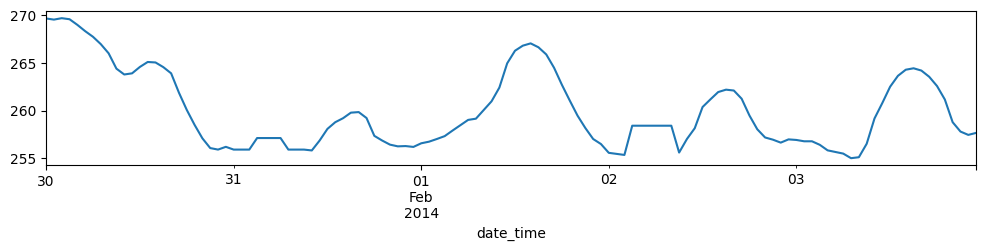

In [28]:
plot_features = df_1['temp']['2014-01-30':'2014-02-03']
_ = plot_features.plot(figsize=(12,2))

### Rain

Rain seems to have only 1 record with extreme value, I'll just set to the general mean value of rain.

In [29]:
df_1[df_1.rain_1h > 100]

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2016-07-11 17:00:00     NaN  302.11   9831.3      0.0          75   

                    weather_main weather_description  traffic_volume  \
date_time                                                              
2016-07-11 17:00:00         Rain     very heavy rain            5535   

                       date_time_numeric  
date_time                                 
2016-07-11 17:00:00  1468256400000000000

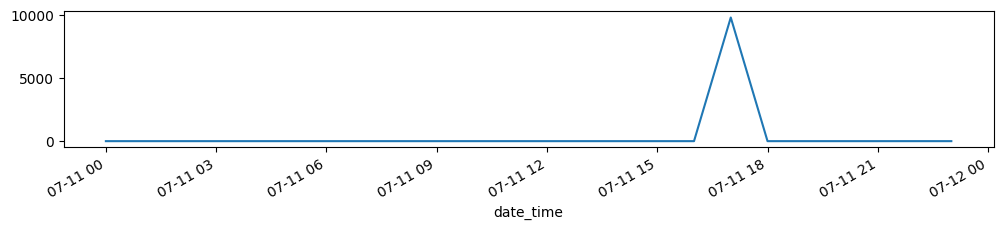

In [30]:
plot_features = df_1.loc['2016-07-11'].rain_1h  # Use .loc with datetime index
_ = plot_features.plot(figsize=(12,2))

In [31]:
df_2 = df_1.copy()
df_2.loc['2016-07-11 17:00:00','rain_1h'] = np.nan
df_2.loc['2016-07-11 17:00:00','rain_1h'] = df_2.rain_1h.mean()

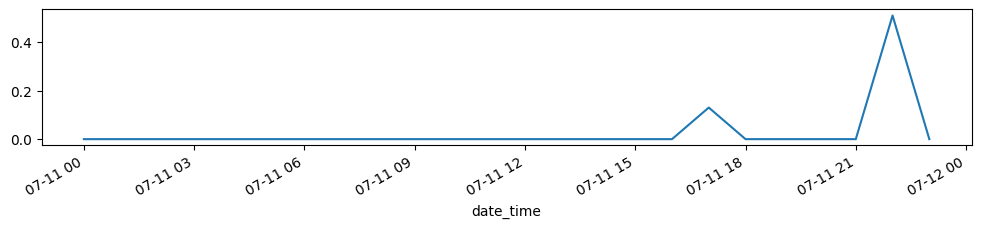

In [32]:
plot_features = df_2.loc['2016-07-11'].rain_1h
_ = plot_features.plot(figsize=(12,2))

### Snow

I cannot determine if the snow has outliers or not, it seems to be an exceptional winter. I'll keep as is.

In [33]:
df_2[(df_2.snow_1h > .2)]

holiday    temp  rain_1h  snow_1h  clouds_all  \
date_time                                                           
2015-12-23 12:00:00     NaN  274.33     0.98     0.51          90   
2015-12-23 12:00:00     NaN  274.33     0.98     0.51          90   
2015-12-23 12:00:00     NaN  274.33     0.98     0.51          90   
2015-12-23 12:00:00     NaN  274.33     0.98     0.51          90   
2015-12-23 14:00:00     NaN  273.74     0.00     0.32          90   
2015-12-23 14:00:00     NaN  273.74     0.00     0.32          90   
2015-12-23 14:00:00     NaN  273.74     0.00     0.32          90   
2015-12-23 16:00:00     NaN  273.86     0.00     0.32          90   
2015-12-23 16:00:00     NaN  273.86     0.00     0.32          90   
2015-12-26 09:00:00     NaN  271.17     0.00     0.21          90   
2015-12-28 21:00:00     NaN  267.25     0.00     0.25          90   
2015-12-28 21:00:00     NaN  267.25     0.00     0.25          90   
2015-12-28 22:00:00     NaN  267.14     0.00     0.44          90   
2015-12-28 22:00:00     NaN  267.14     0.00     0.44          90   
2015-12-28 23:00:00     NaN  267.06     0.00     0.51          90   
2015-12-28 23:00:00     NaN  267.06     0.00     0.51          90   
2016-01-06 21:00:00     NaN  272.47     0.00     0.25          90   
2016-01-06 21:00:00     NaN  272.47     0.00     0.25          90   
2016-01-08 13:00:00     NaN  273.80     0.00     0.25          90   
2016-01-08 13:00:00     NaN  273.80     0.00     0.25          90   

                    weather_main weather_description  traffic_volume  \
date_time                                                              
2015-12-23 12:00:00         Rain       moderate rain            5167   
2015-12-23 12:00:00         Snow                snow            5167   
2015-12-23 12:00:00         Mist                mist            5167   
2015-12-23 12:00:00          Fog                 fog            5167   
2015-12-23 14:00:00         Snow          light snow            5182   
2015-12-23 14:00:00         Mist                mist            5182   
2015-12-23 14:00:00         Rain       moderate rain            5182   
2015-12-23 16:00:00         Snow          light snow            5222   
2015-12-23 16:00:00         Mist                mist            5222   
2015-12-26 09:00:00         Snow          light snow            2013   
2015-12-28 21:00:00         Snow                snow            2149   
2015-12-28 21:00:00         Mist                mist            2149   
2015-12-28 22:00:00         Snow                snow            2165   
2015-12-28 22:00:00         Mist                mist            2165   
2015-12-28 23:00:00         Snow                snow             888   
2015-12-28 23:00:00         Mist                mist             888   
2016-01-06 21:00:00         Snow          light snow            2077   
2016-01-06 21:00:00         Mist                mist            2077   
2016-01-08 13:00:00         Snow          light snow            4933   
2016-01-08 13:00:00         Mist                mist            4933   

                       date_time_numeric  
date_time                                 
2015-12-23 12:00:00  1450872000000000000  
2015-12-23 12:00:00  1450872000000000000  
2015-12-23 12:00:00  1450872000000000000  
2015-12-23 12:00:00  1450872000000000000  
2015-12-23 14:00:00  1450879200000000000  
2015-12-23 14:00:00  1450879200000000000  
2015-12-23 14:00:00  1450879200000000000  
2015-12-23 16:00:00  1450886400000000000  
2015-12-23 16:00:00  1450886400000000000  
2015-12-26 09:00:00  1451120400000000000  
2015-12-28 21:00:00  1451336400000000000  
2015-12-28 21:00:00  1451336400000000000  
2015-12-28 22:00:00  1451340000000000000  
2015-12-28 22:00:00  1451340000000000000  
2015-12-28 23:00:00  1451343600000000000  
2015-12-28 23:00:00  1451343600000000000  
2016-01-06 21:00:00  1452114000000000000  
2016-01-06 21:00:00  1452114000000000000  
2016-01-08 13:00:00  1452258000000000000  
2016-01-08 13

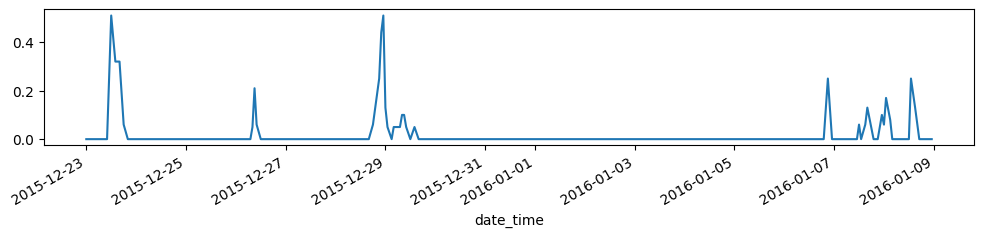

In [34]:
plot_features = df_2['2015-12-23':'2016-01-08'].snow_1h
_ = plot_features.plot(figsize=(12,2))

### Cleaned Data Overview

The data overview looks better now, but still I'm concerned with the missing data block between years 2014 and 2015.

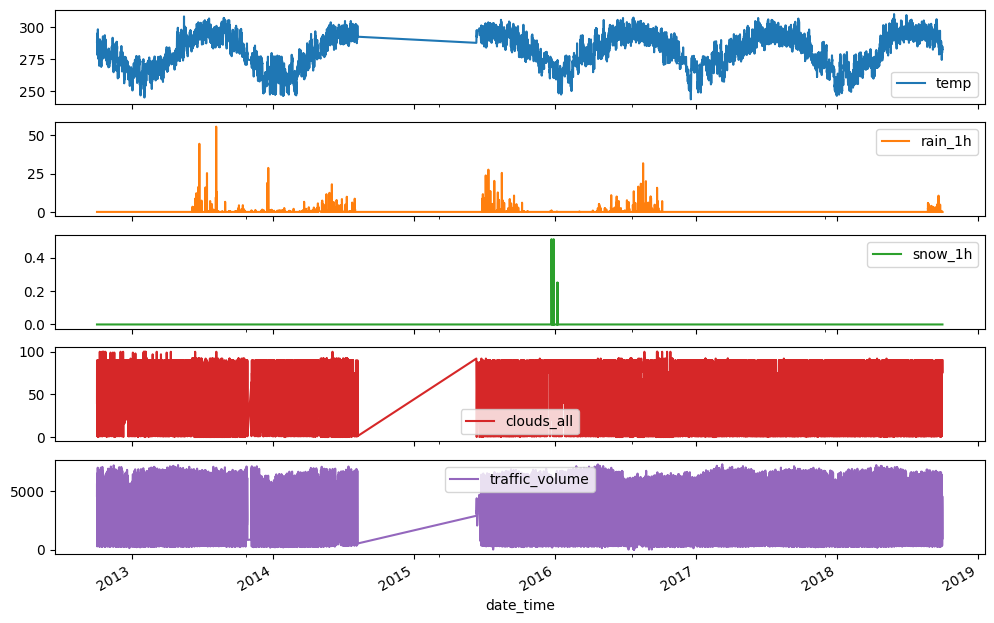

In [35]:
plot_features = df_2[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

### Feature engineering

**Weather_main and Weather description**

I decided to transform the weather_main into one-hot encoded variables, and to drop the weather_description as I see that it adds kind of redundant information with weather_main.

In [36]:
df_3 = df_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   holiday            61 non-null     object 
 1   temp               48204 non-null  float64
 2   rain_1h            48204 non-null  float64
 3   snow_1h            48204 non-null  float64
 4   clouds_all         48204 non-null  int64  
 5   weather_main       48204 non-null  object 
 6   traffic_volume     48204 non-null  int64  
 7   date_time_numeric  48204 non-null  int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 4.3+ MB


In [37]:
df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               61 non-null     object 
 1   temp                  48204 non-null  float64
 2   rain_1h               48204 non-null  float64
 3   snow_1h               48204 non-null  float64
 4   clouds_all            48204 non-null  int64  
 5   traffic_volume        48204 non-null  int64  
 6   date_time_numeric     48204 non-null  int64  
 7   weather_Clear         48204 non-null  bool   
 8   weather_Clouds        48204 non-null  bool   
 9   weather_Drizzle       48204 non-null  bool   
 10  weather_Fog           48204 non-null  bool   
 11  weather_Haze          48204 non-null  bool   
 12  weather_Mist          48204 non-null  bool   
 13  weather_Rain          48204 non-null  bool   
 14  weather_Smoke         48204 non-nul

### Holidays and Weekends

I think the valuable information to capture is wether the day is a holiday or a weekend. We don't need to keep track which holiday. So, we will create a new feature is_holiday and drop the old feature holiday. We don't need to keep track which weekend it is. So, we will create a new feature is_weekend.

In [38]:
df_4 = df_3.copy()
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   date_time_numeric     48204 non-null  int64  
 6   weather_Clear         48204 non-null  bool   
 7   weather_Clouds        48204 non-null  bool   
 8   weather_Drizzle       48204 non-null  bool   
 9   weather_Fog           48204 non-null  bool   
 10  weather_Haze          48204 non-null  bool   
 11  weather_Mist          48204 non-null  bool   
 12  weather_Rain          48204 non-null  bool   
 13  weather_Smoke         48204 non-null  bool   
 14  weather_Snow          48204 non-nul

In [39]:
# Check sample values that are expected NOT TO BE a holiday
df_4[df_4.is_holiday == 0].head()

Empty DataFrame
Columns: [temp, rain_1h, snow_1h, clouds_all, traffic_volume, date_time_numeric, weather_Clear, weather_Clouds, weather_Drizzle, weather_Fog, weather_Haze, weather_Mist, weather_Rain, weather_Smoke, weather_Snow, weather_Squall, weather_Thunderstorm, is_holiday]
Index: []

In [40]:
# Check sample values that are expected TO BE a holiday
df_4[df_4.is_holiday == 1].head()

temp  rain_1h  snow_1h  clouds_all  traffic_volume  \
date_time                                                                   
2012-10-02 09:00:00  288.28      0.0      0.0          40            5545   
2012-10-02 10:00:00  289.36      0.0      0.0          75            4516   
2012-10-02 11:00:00  289.58      0.0      0.0          90            4767   
2012-10-02 12:00:00  290.13      0.0      0.0          90            5026   
2012-10-02 13:00:00  291.14      0.0      0.0          75            4918   

                       date_time_numeric  weather_Clear  weather_Clouds  \
date_time                                                                 
2012-10-02 09:00:00  1349168400000000000          False            True   
2012-10-02 10:00:00  1349172000000000000          False            True   
2012-10-02 11:00:00  1349175600000000000          False            True   
2012-10-02 12:00:00  1349179200000000000          False            True   
2012-10-02 13:00:00  1349182800000000000          False            True   

                     weather_Drizzle  weather_Fog  weather_Haze  weather_Mist  \
date_time                                                                       
2012-10-02 09:00:00            False        False         False         False   
2012-10-02 10:00:00            False        False         False         False   
2012-10-02 11:00:00            False        False         False         False   
2012-10-02 12:00:00            False        False         False         False   
2012-10-02 13:00:00            False        False         False         False   

                     weather_Rain  weather_Smoke  weather_Snow  \
date_time                                                        
2012-10-02 09:00:00         False          False         False   
2012-10-02 10:00:00         False          False         False   
2012-10-02 11:00:00         False          False         False   
2012-10-02 12:00:00         False          False         False   
2012-10-02 13:00:00         False          False         False   

                     weather_Squall  weather_Thunderstorm  is_holiday  
date_time                                                              
2012-10-02 09:00:00           False                 False           1  
2012-10-02 10:00:00           False                 False           1  
2012-10-02 11:00:00           False                 False           1  
2012-10-02 12:00:00           False                 False           1  
2012-10-02 13:00:00           False                 False           1

In [41]:
df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int64', name='date_time', length=48204)

In [42]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   date_time_numeric     48204 non-null  int64  
 6   weather_Clear         48204 non-null  bool   
 7   weather_Clouds        48204 non-null  bool   
 8   weather_Drizzle       48204 non-null  bool   
 9   weather_Fog           48204 non-null  bool   
 10  weather_Haze          48204 non-null  bool   
 11  weather_Mist          48204 non-null  bool   
 12  weather_Rain          48204 non-null  bool   
 13  weather_Smoke         48204 non-null  bool   
 14  weather_Snow          48204 non-nul

In [43]:
# Check sample values that are expected NOT TO BE a weekend
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date_time', length=34501)

In [44]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_time', length=13703)

### Time

Similarly the Date Time column is very useful, but not in this form. We converting it to seconds:

In [45]:
timestamp_s = df_4.index.map(datetime.datetime.timestamp)

My assumption is that the traffic flow is seasonal and periodic based on daily and yearly periodicity.

A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals:

In [46]:
day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_4['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_4['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_4['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_4

temp  rain_1h  snow_1h  clouds_all  traffic_volume  \
date_time                                                                   
2012-10-02 09:00:00  288.28      0.0      0.0          40            5545   
2012-10-02 10:00:00  289.36      0.0      0.0          75            4516   
2012-10-02 11:00:00  289.58      0.0      0.0          90            4767   
2012-10-02 12:00:00  290.13      0.0      0.0          90            5026   
2012-10-02 13:00:00  291.14      0.0      0.0          75            4918   
...                     ...      ...      ...         ...             ...   
2018-09-30 19:00:00  283.45      0.0      0.0          75            3543   
2018-09-30 20:00:00  282.76      0.0      0.0          90            2781   
2018-09-30 21:00:00  282.73      0.0      0.0          90            2159   
2018-09-30 22:00:00  282.09      0.0      0.0          90            1450   
2018-09-30 23:00:00  282.12      0.0      0.0          90             954   

                       date_time_numeric  weather_Clear  weather_Clouds  \
date_time                                                                 
2012-10-02 09:00:00  1349168400000000000          False            True   
2012-10-02 10:00:00  1349172000000000000          False            True   
2012-10-02 11:00:00  1349175600000000000          False            True   
2012-10-02 12:00:00  1349179200000000000          False            True   
2012-10-02 13:00:00  1349182800000000000          False            True   
...                                  ...            ...             ...   
2018-09-30 19:00:00  1538334000000000000          False            True   
2018-09-30 20:00:00  1538337600000000000          False            True   
2018-09-30 21:00:00  1538341200000000000          False           False   
2018-09-30 22:00:00  1538344800000000000          False            True   
2018-09-30 23:00:00  1538348400000000000          False            True   

                     weather_Drizzle  weather_Fog  ...  weather_Smoke  \
date_time                                          ...                  
2012-10-02 09:00:00            False        False  ...          False   
2012-10-02 10:00:00            False        False  ...          False   
2012-10-02 11:00:00            False        False  ...          False   
2012-10-02 12:00:00            False        False  ...          False   
2012-10-02 13:00:00            False        False  ...          False   
...                              ...          ...  ...            ...   
2018-09-30 19:00:00            False        False  ...          False   
2018-09-30 20:00:00            False        False  ...          False   
2018-09-30 21:00:00            False        False  ...          False   
2018-09-30 22:00:00            False        False  ...          False   
2018-09-30 23:00:00            False        False  ...          False   

                     weather_Snow  weather_Squall  weather_Thunderstorm  \
date_time                                                                 
2012-10-02 09:00:00         False           False                 False   
2012-10-02 10:00:00         False           False                 False   
2012-10-02 11:00:00         False           False                 False   
2012-10-02 12:00:00         False           False                 False   
2012-10-02 13:00:00         False           False                 False   
...                           ...             ...                   ...   
2018-09-30 19:00:00         False           False                 False   
2018-09-30 20:00:00         False           False                 False   
2018-09-30 21:00:00         False           False                  True   
2018-09-30 22:00:00         False           False                 False   
2018-09-30 23:00:00         False           False                 False   

                     is_holiday  is_weekend       Day sin   Day cos  Year sin  \
date_time                             

Text(0.5, 1.0, 'Time of day signal')

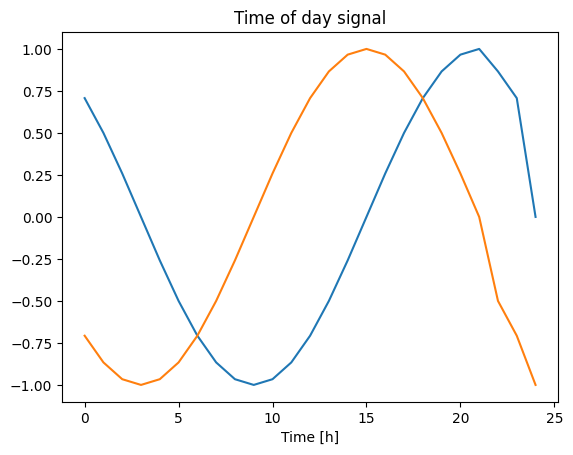

In [47]:
plt.plot(np.array(df_4['Day sin'])[:25])
plt.plot(np.array(df_4['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

If you didn't know, you can determine which frequencies are important using an fft. To check our assumptions, here is the tf.signal.rfft of the traffic_volume over time. Note the obvious peaks at frequencies near 1/year and 1/day:

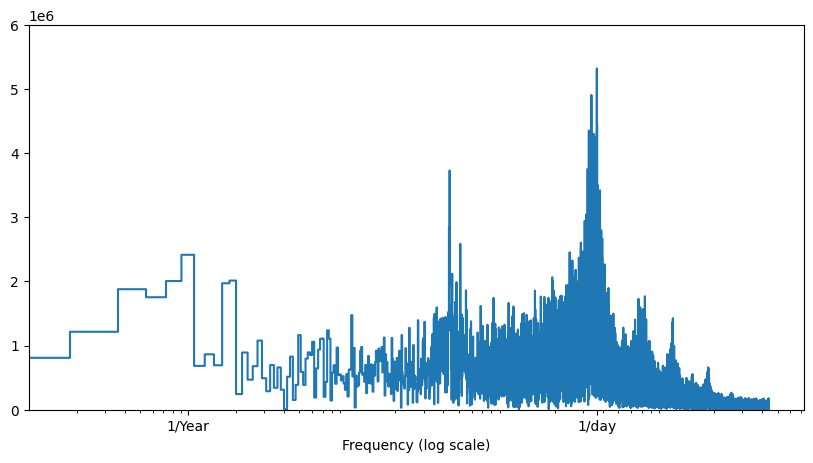

In [48]:
fft = tf.signal.rfft(df_4['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_4['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(10, 5))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 6e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Let's also break down the date_time components into other fields.

In [49]:
df_4['dayofweek'] = df_4.index.dayofweek
df_4['day'] = df_4.index.day
df_4['month'] = df_4.index.month
df_4['year'] = df_4.index.year
df_4['day_hour'] = df_4.index.hour

### Reorder dataframe columns

In [50]:
df_5 = df_4.copy()

Set the traffic_volume to be the first column for ease of use later when we perform predictions

In [51]:
df_5.insert(0, 'traffic_volume', df_5.pop('traffic_volume'))
df_5.insert(1, 'Day sin', df_5.pop('Day sin'))
df_5.insert(2, 'Day cos', df_5.pop('Day cos'))
df_5.insert(3, 'Year sin', df_5.pop('Year sin'))
df_5.insert(4, 'Year cos', df_5.pop('Year cos'))
df_5.insert(5, 'temp', df_5.pop('temp'))
df_5.insert(6, 'clouds_all', df_5.pop('clouds_all'))
df_5.insert(7, 'rain_1h', df_5.pop('rain_1h'))
df_5.insert(8, 'snow_1h', df_5.pop('snow_1h'))
df_5.insert(9, 'is_weekend', df_5.pop('is_weekend'))
df_5.insert(10, 'is_holiday', df_5.pop('is_holiday'))

### Save clean data

In [52]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  date_time_numeric     48204 non-null  int64  
 12  weather_Clear         48204 non-null  bool   
 13  weather_Clouds        48204 non-null  bool   
 14  weather_Drizzle       48204 non-nul

In [53]:
df_5.to_csv('C:\\Users\\nomaniqbal\\Desktop\\This Week\\Metro_Interstate_Traffic_Volume\\metro_interstate_clean.zip',
          compression=dict(method='zip', archive_name='C:\\Users\\nomaniqbal\\Desktop\\This Week\\Metro_Interstate_Traffic_Volume\metro_interstate_clean.csv'),
          index=True)

### Prepare for timeseries data processing

Load clean data

In [54]:
df_clean = pd.read_csv(r'C:\Users\nomaniqbal\Desktop\This Week\Metro_Interstate_Traffic_Volume\metro_interstate_clean.zip', parse_dates=['date_time'], index_col='date_time')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  date_time_numeric     48204 non-null  int64  
 12  weather_Clear         48204 non-null  bool   
 13  weather_Clouds        48204 non-null  bool   
 14  weather_Drizzle       48204 non-nul

In [55]:
df_clean.describe().T

count          mean           std           min  \
traffic_volume     48204.0  3.259818e+03  1.986861e+03  0.000000e+00   
Day sin            48204.0  1.428336e-02  7.084205e-01 -1.000000e+00   
Day cos            48204.0  6.631123e-03  7.056296e-01 -1.000000e+00   
Year sin           48204.0  1.231692e-02  6.976266e-01 -1.000000e+00   
Year cos           48204.0 -3.172024e-02  7.156675e-01 -1.000000e+00   
temp               48204.0  2.812594e+02  1.271272e+01  2.433900e+02   
clouds_all         48204.0  4.936223e+01  3.901575e+01  0.000000e+00   
rain_1h            48204.0  1.303147e-01  1.003368e+00  0.000000e+00   
snow_1h            48204.0  2.223882e-04  8.167611e-03  0.000000e+00   
is_weekend         48204.0  2.842710e-01  4.510712e-01  0.000000e+00   
is_holiday         48204.0  1.000000e+00  0.000000e+00  1.000000e+00   
date_time_numeric  48204.0  1.451991e+18  5.900070e+16  1.349168e+18   
dayofweek          48204.0  2.984980e+00  2.005941e+00  0.000000e+00   
day                48204.0  1.573764e+01  8.722938e+00  1.000000e+00   
month              48204.0  6.506037e+00  3.400221e+00  1.000000e+00   
year               48204.0  2.015512e+03  1.893211e+00  2.012000e+03   
day_hour           48204.0  1.139816e+01  6.940238e+00  0.000000e+00   

                            25%           50%           75%           max  
traffic_volume     1.193000e+03  3.380000e+03  4.933000e+03  7.280000e+03  
Day sin           -7.071068e-01  1.525486e-12  7.071068e-01  1.000000e+00  
Day cos           -7.071068e-01  6.790957e-13  7.071068e-01  1.000000e+00  
Year sin          -6.659690e-01 -6.909727e-03  7.063296e-01  1.000000e+00  
Year cos          -7.442632e-01 -9.217264e-02  7.066036e-01  1.000000e+00  
temp               2.721600e+02  2.824500e+02  2.918060e+02  3.100700e+02  
clouds_all         1.000000e+00  6.400000e+01  9.000000e+01  1.000000e+02  
rain_1h            0.000000e+00  0.000000e+00  0.000000e+00  5.563000e+01  
snow_1h            0.000000e+00  0.000000e+00  0.000000e+00  5.100000e-01  
is_weekend         0.000000e+00  0.000000e+00  1.000000e+00  1.000000e+00  
is_holiday         1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
date_time_numeric  1.391687e+18  1.465616e+18  1.502431e+18  1.538348e+18  
dayofweek          1.000000e+00  3.000000e+00  5.000000e+00  6.000000e+00  
day                8.000000e+00  1.600000e+01  2.300000e+01  3.100000e+01  
month              4.000000e+00  7.000000e+00  9.000000e+00  1.200000e+01  
year               2.014000e+03  2.016000e+03  2.017000e+03  2.018000e+03  
day_hour           5.000000e+00  1.100000e+01  1.700000e+01  2.300000e+01

Let's check for duplicate hourly entries, these are records having the same date_hour, which is not right as per the expectation of hourly samples.

In [56]:
df_clean.index.duplicated().sum()

7629

* There 7629 duplicate hourly entries.
* We should fix this by resampling the data to be on 1 hour basis, so that each record resembles only one hour.
* Duplicate hour records will be averaged within the same hour.

### Split the data

The data will not be randomly shuffled before splitting. This is for two reasons.
1. It ensures that chopping the data into windows of consecutive samples is still possible.
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [57]:
column_indices = {name: i for i, name in enumerate(df_clean.columns)}
print('Full dataset:\t', df_clean.shape[0])
num_features = df_clean.shape[1]
print('Number of features:', num_features)

Full dataset:	 48204
Number of features: 28


In [58]:
sorted(column_indices.items(), key=lambda x: x[1])

[('traffic_volume', 0),
 ('Day sin', 1),
 ('Day cos', 2),
 ('Year sin', 3),
 ('Year cos', 4),
 ('temp', 5),
 ('clouds_all', 6),
 ('rain_1h', 7),
 ('snow_1h', 8),
 ('is_weekend', 9),
 ('is_holiday', 10),
 ('date_time_numeric', 11),
 ('weather_Clear', 12),
 ('weather_Clouds', 13),
 ('weather_Drizzle', 14),
 ('weather_Fog', 15),
 ('weather_Haze', 16),
 ('weather_Mist', 17),
 ('weather_Rain', 18),
 ('weather_Smoke', 19),
 ('weather_Snow', 20),
 ('weather_Squall', 21),
 ('weather_Thunderstorm', 22),
 ('dayofweek', 23),
 ('day', 24),
 ('month', 25),
 ('year', 26),
 ('day_hour', 27)]

The split distribution without timeseries resampling to 1 hour samples (Has duplicates)

In [59]:
train_df0 = df_clean[:-15000]
print('train_df:\t', train_df0.shape[0])
val_df0 = df_clean[-15000:-5000]
print('val_df:\t\t', val_df0.shape[0])
test_df0 = df_clean[-5000:]
print('test_df:\t', test_df0.shape[0])

train_df:	 33204
val_df:		 10000
test_df:	 5000


In [60]:
train_df = df_clean[:-15000].resample('1H').mean().pad()
print('train_df:\t', train_df.shape[0])
val_df = df_clean[-15000:-5000].resample('1H').mean().pad()
print('val_df:\t\t', val_df.shape[0])
test_df = df_clean[-5000:].resample('1H').mean().pad()
print('test_df:\t', test_df.shape[0])

train_df:	 40110
val_df:		 8359
test_df:	 4083


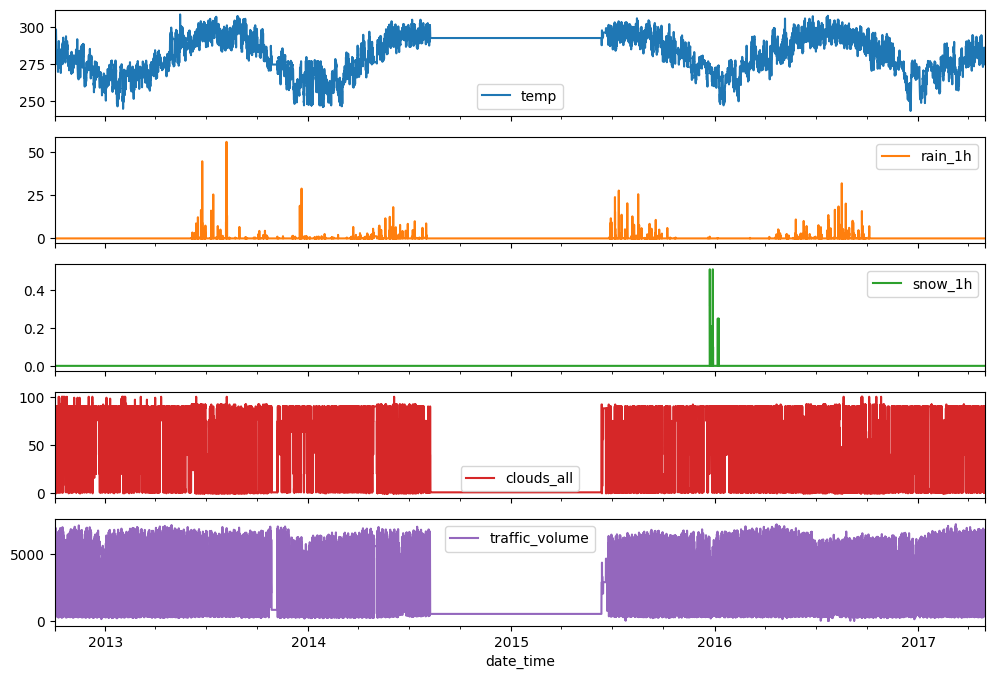

In [61]:
plot_features = train_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

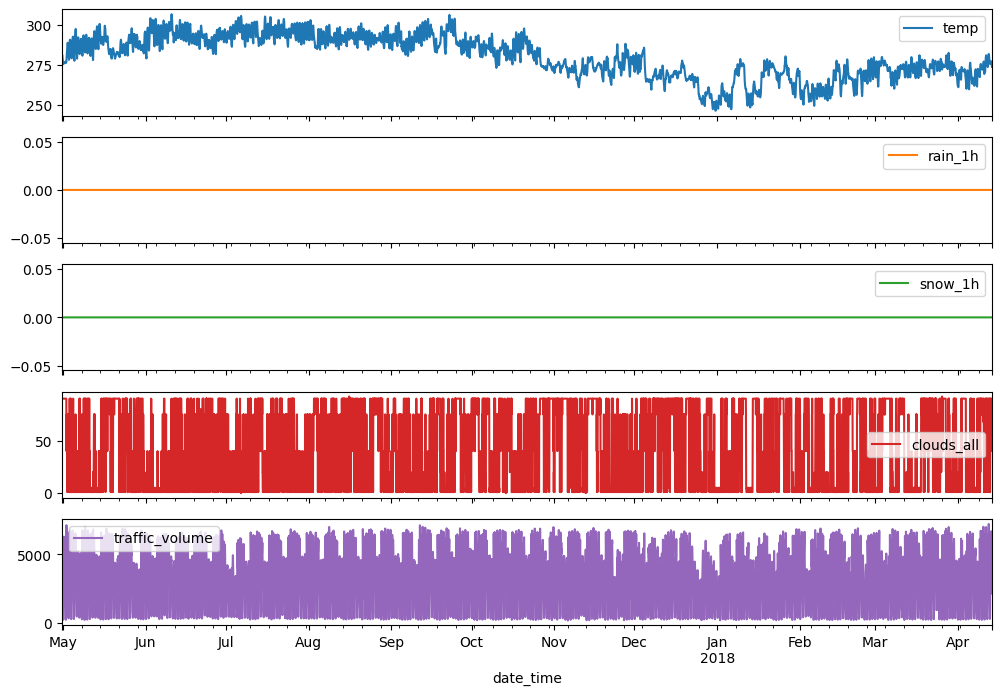

In [62]:
plot_features = val_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

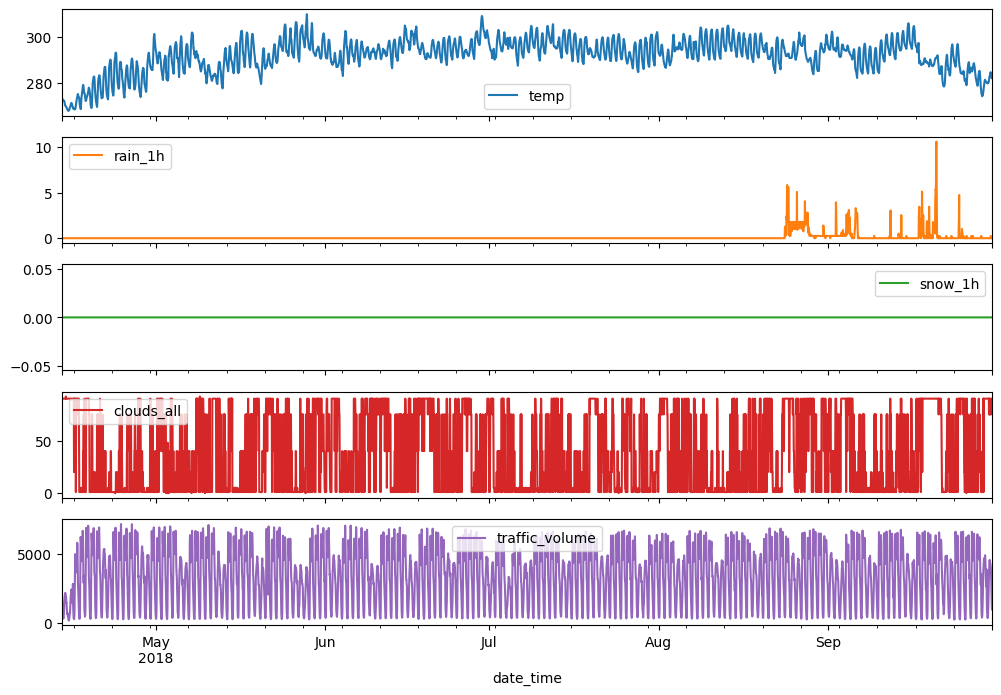

In [63]:
plot_features = test_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))


I notice that that the validation data has no rain or snow data point. Not sure how will this affect the Testing predictions.

### Normalize the data

It is important to scale features before training a neural network. I tested the results using both MinMaxScaler and StandardScaler. I got better results with the MinMaxScaler, So I'll be using scikit-learn MinMaxScaler.

In [64]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
my_scaler = MinMaxScaler().fit(train_df)
my_scaler_tv = MinMaxScaler().fit(train_df[['traffic_volume']])
scaled_train_df = pd.DataFrame(my_scaler.transform(train_df), index=train_df.index, columns=train_df.columns)
scaled_val_df = pd.DataFrame(my_scaler.transform(val_df), index=val_df.index, columns=val_df.columns)
scaled_test_df = pd.DataFrame(my_scaler.transform(test_df), index=test_df.index, columns=test_df.columns)

#Let's test the normalizaing and denormalizing scheme
train_df.traffic_volume[0], scaled_train_df.traffic_volume[0], float(my_scaler_tv.inverse_transform(scaled_train_df[['traffic_volume']])[0])


(5545.0, 0.7616758241758241, 5545.0)

In [65]:
# Single value denormalization
float(my_scaler_tv.inverse_transform(np.array([[.7]]))[0])


5096.0

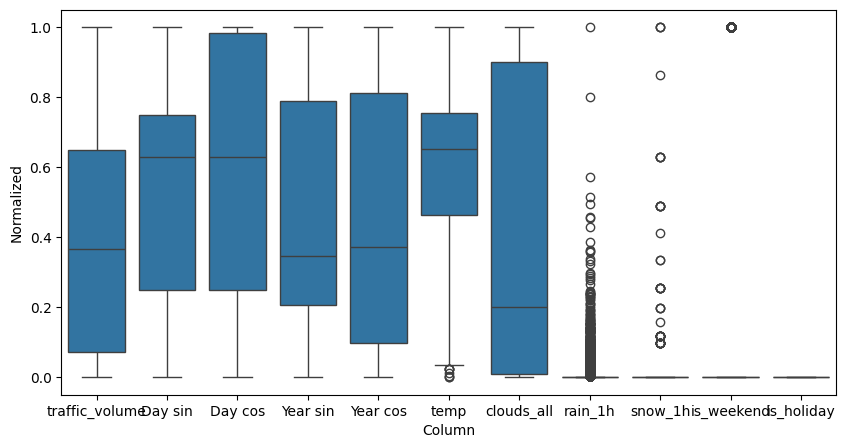

In [66]:
df_scaled = scaled_train_df.iloc[:,:11].melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(10, 5))
ax = sns.boxplot(x='Column', y='Normalized', data=df_scaled)

The data is showing rain and snow having alot of outliers. I'm unaware if this is corrupt data or if that's the actual weather in that area.

In [67]:
# Utility functions
# Special Characters for Output Formating
StartBold = "\033[1m"
EndBold = "\033[0m"

### WindowGenerator

I modified the WindowGenerator class to have all the required methods and properties consolidated from the beginging in contrast to the original design of adding the methods and properties at subsequent steps.

In [68]:
'''
[Code Provided by the tutorial]
The WindowGenerator class.
Start by creating the `WindowGenerator` class. The `__init__` method includes
all the necessary logic for the input and label indices.
It also takes the train, eval, and test dataframes as input.
These will be converted to `tf.data.Dataset`s of windows later.

This class can:

1 - Handle the indexes and offsets as shown in the diagrams above.
2 - Split windows of features into a (features, labels) pairs.
3 - Plot the content of the resulting windows.
4 - Efficiently generate batches of these windows from the training, evaluation, and test data, using tf.data.Datasets.
'''
class WindowGenerator():
  def __init__(self, input_width, label_width, shift, batch_size=32,
               train_df=scaled_train_df, val_df=scaled_val_df, test_df=scaled_test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.example = None

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    self.batch_size = batch_size

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size} = {self.input_width}+({self.shift-self.label_width}+{self.label_width})',
        f'Batch size: {self.batch_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices} start: [{self.label_start}]',
        f'Label column name(s): {self.label_columns}'])

  def split_window(self, features):
    '''
      Given a list consecutive inputs, the split_window method will convert
      them to a window of inputs and a window of labels.
    '''
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='traffic_volume', max_subplots=3):
    '''
      The plot method that allows a simple visualization of the split window
    '''
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(max_n, 1, n+1)
      plt.ylabel(f'{plot_col} [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [h]')
    # Maskar: Added this line show that we are only showing n slices
    plt.suptitle(f'Showing only {max_n} slices')

  def make_dataset(self, data):
    '''
      Make_dataset method will take a time series DataFrame and convert it to
      a tf.data.Dataset of (input_window, label_window) pairs using the
      preprocessing.timeseries_dataset_from_array function.
    '''
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False, # Maskar: I changed this to False
        batch_size=self.batch_size, # 32,
        )

    ds = ds.map(self.split_window)

    return ds

  # The WindowGenerator object holds training, validation and test data.
  # Add properties for accessing them as tf.data.Datasets using the above make_dataset method.
  # Also add a standard example batch for easy access and plotting:
  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)

  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.train))
      # And cache it for next time
      self._example = result
    return result

  @example.setter
  def example(self, var):
    self._example = var

### plotting

In [69]:
def plot_train_validation(history, validation_data, metric='mean_absolute_error'):
    '''
    Function to plot the training and validation accuracy progress with epochs for a single model
    '''
    plt.plot(history.history[metric], label='train')  # For TF2
    plt.plot(history.history['val_'+metric], label='valid.')  # For TF2
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    #plt.xticks(range(1,len(history.history['loss'])+1,2))
    #plt.ylim([0.5, 1])
    plt.title(f'{len(history.history[metric])} epochs')
    plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
    plt.legend(loc='upper right')
    plt.show()

    # Evaluate the learned model with validation set
    print(f'\n\n{StartBold}Validation Scores:{EndBold}\n')
    _ = history.model.evaluate(validation_data, verbose=2)

In [70]:
class TrainingPlot(Callback):
    '''
      A keras callback helper function to plot
      the taining/validation plot after each epoch
    '''
    def __init__(self, loss_metric='mean_absolute_error'):
      super().__init__()
      self.loss_metric = loss_metric

    # This function is called when the training begins
    def on_train_begin(self, logs={}):
        # Initialize the lists for holding the logs, losses and metrics
        self.losses = []
        self.val_losses = []
        self.logs = []

    # This function is called at the end of each epoch
    def on_epoch_end(self, epoch, logs={}):
        loss = logs.get(self.loss_metric)
        val_loss = logs.get('val_'+self.loss_metric)

        # Append the logs, losses and accuracies to the lists
        self.logs.append(logs)
        self.losses.append(loss)
        self.val_losses.append(val_loss)

        # Plots every n-th epoch
        if epoch > 0 and epoch%1==0:

            # Clear the previous plot
            IPython.display.clear_output(wait=True)
            #clear_output(wait=True)
            N = np.arange(0, len(self.losses))

            # You can chose the style of your preference
            #plt.style.use("seaborn")
            #plt.figure(figsize=(10,3))
            plt.xlabel('Epoch')
            plt.ylabel(self.loss_metric)
            plt.plot(N, self.losses, label='train')
            plt.plot(N, self.val_losses, label='valid.')
            plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)
            val_denorm = np.float(my_scaler_tv.inverse_transform(np.array([[val_loss]])))
            plt.title(f'Last validation value = {val_denorm:.2f}')
            plt.legend(loc='upper right')
            plt.show()

### Compile and fit

In [71]:
def compile_and_fit(model, window, patience=5, max_epochs=30,
                    model_label='model', log_dict=None):
    plot_metrics = TrainingPlot()

    rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, min_delta=0.001, patience=patience, mode='min', verbose=1 )

    #mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True )

    model.compile( optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()] )

    history = model.fit( window.train, epochs=max_epochs, validation_data=window.val, callbacks=[plot_metrics, early_stopping, rlr] )

    if log_dict:
        log_dict['my_models'][model_label] = model

        IPython.display.clear_output()

        print(f'\n\n{StartBold}Training vs. Validation:{EndBold}\n')
        plot_train_validation(history, window.val)

        log_dict['multi_val_performance'][model_label] = model.evaluate(window.val, verbose=0)
        log_dict['multi_performance'][model_label] = model.evaluate(window.train, verbose=0)


    predictions = model.predict(window.val)
    evaluate_predictions(val_df.traffic_volume, predictions)
    return history

### Evaluate predictions

In [72]:
def evaluate_predictions(y_true, y_pred, plot_start_index=-500):
    print(f'\n\n{StartBold}Predictions Evaluation:{EndBold}\n')
    y_p = np.asarray(my_scaler_tv.inverse_transform(y_pred.reshape(-1,1))).ravel()
    n_predictions = len(y_p)
    y = np.asarray(y_true[-n_predictions:]).ravel()
    print('Predictions:', n_predictions)
    mae = np.float(tf.metrics.mean_absolute_error(y, y_p))
    mae_scaled = np.float(my_scaler_tv.transform(np.array([[mae]])))
    print(f'MAE: {mae:.2f} ({mae_scaled:.4f})')

    plt.subplots(figsize=(15,2))
    plt.plot(y[plot_start_index:], marker='.', label='true')
    plt.plot(y_p[plot_start_index:], marker='.', label='predicted')
    plt.legend()
    plt.show()

### The models

The required window

Total window size: 8 = 6+(1+1)
Batch size: 32
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']

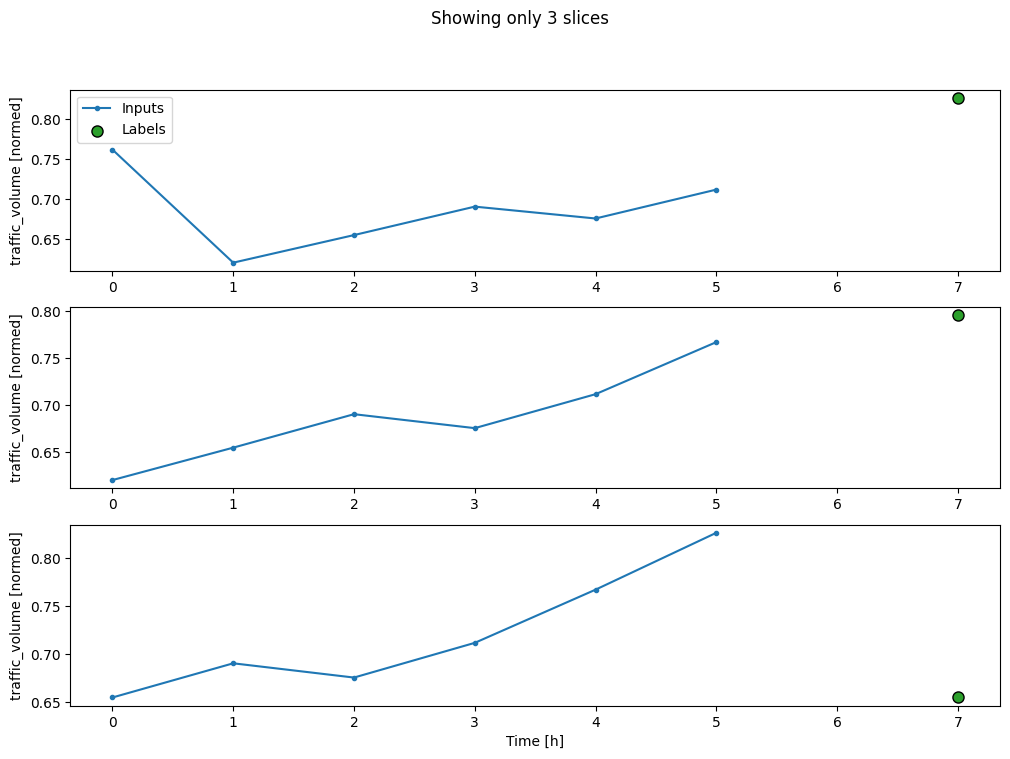

In [73]:
INPUT_WIDTH = 6
OUT_STEPS = 1
SHIFT = 2
base_window = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )

base_window.plot()
base_window

### Baseline Models

In [74]:
multi_val_performance = {}
multi_performance = {}
my_models = {}

my_log = {
    'multi_val_performance':multi_val_performance,
    'multi_performance':multi_performance,
    'my_models':my_models
    }

I set all the models to converge into a single output value, which is the traffic volume at the 8th day based on 6 days input of the full features.

### Dense

Using only layers.Dense between the input and output gives a decent linear model.

In [75]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


Epoch 1/20
1250/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0245 - mean_absolute_error: 0.1056

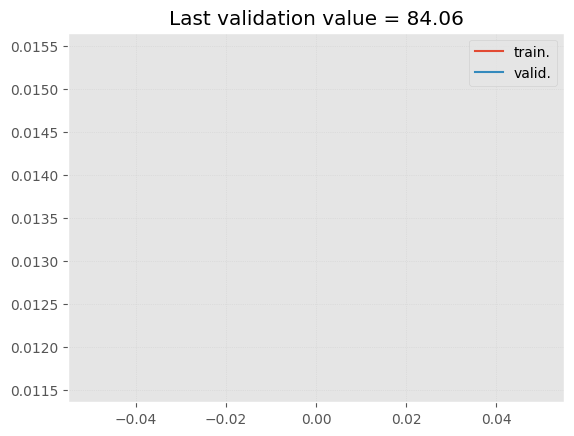

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.1055 - val_loss: 0.0115 - val_mean_absolute_error: 0.0809 - learning_rate: 0.0010
Epoch 2/20
1246/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0761

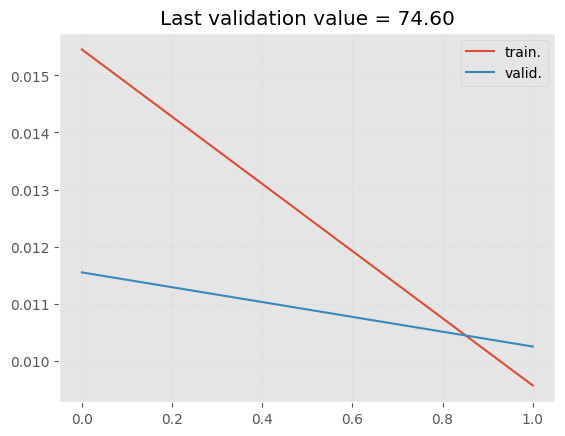

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0760 - val_loss: 0.0102 - val_mean_absolute_error: 0.0767 - learning_rate: 0.0010
Epoch 3/20
1252/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0691

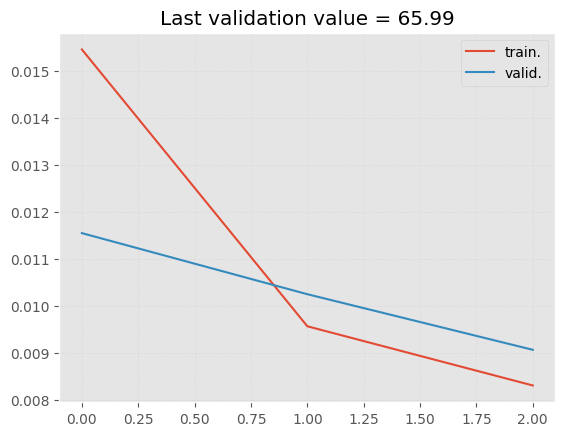

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0691 - val_loss: 0.0091 - val_mean_absolute_error: 0.0716 - learning_rate: 0.0010
Epoch 4/20
1242/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0654

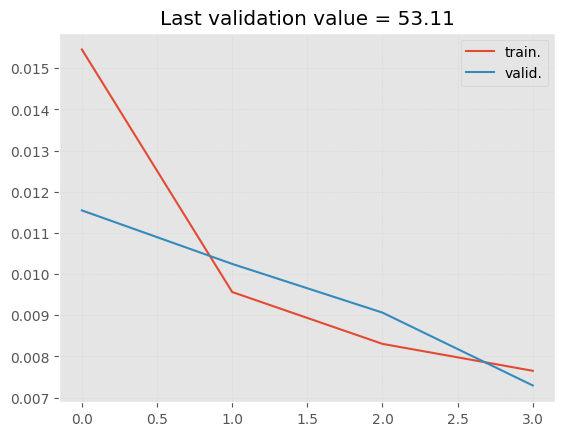

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0653 - val_loss: 0.0073 - val_mean_absolute_error: 0.0633 - learning_rate: 0.0010
Epoch 5/20
1253/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0625

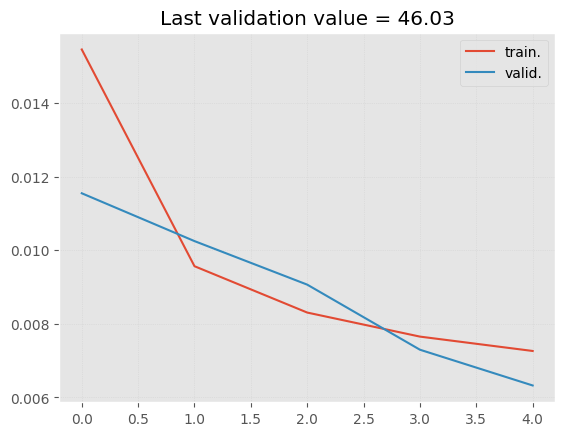

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0092 - mean_absolute_error: 0.0625 - val_loss: 0.0063 - val_mean_absolute_error: 0.0578 - learning_rate: 0.0010
Epoch 6/20
1250/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0598

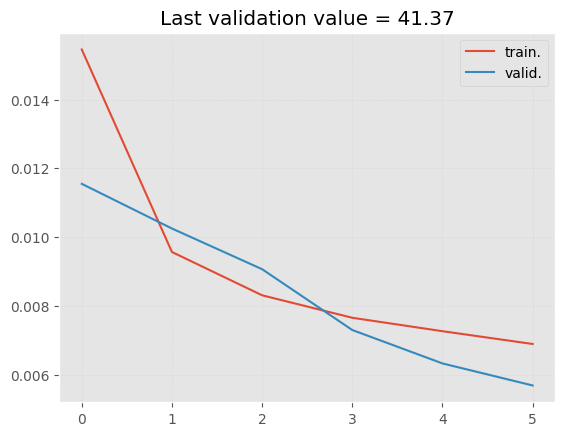

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.0086 - mean_absolute_error: 0.0598 - val_loss: 0.0057 - val_mean_absolute_error: 0.0536 - learning_rate: 0.0010
Epoch 7/20
1251/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0575

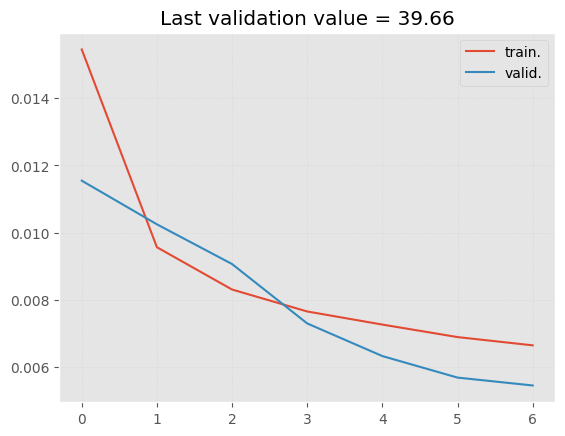

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0081 - mean_absolute_error: 0.0575 - val_loss: 0.0054 - val_mean_absolute_error: 0.0519 - learning_rate: 0.0010
Epoch 8/20
1253/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0562

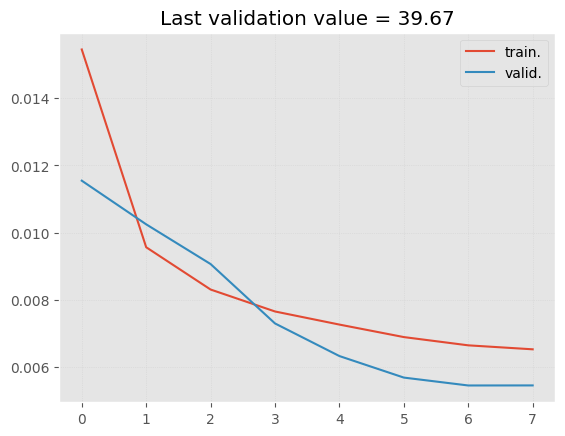


Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0079 - mean_absolute_error: 0.0562 - val_loss: 0.0054 - val_mean_absolute_error: 0.0522 - learning_rate: 0.0010
Epoch 9/20
1241/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0537

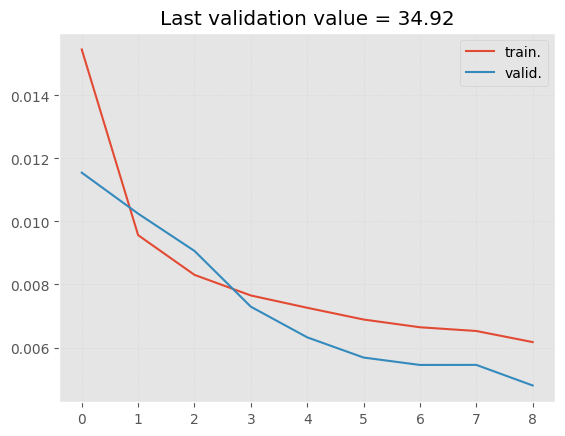

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.0075 - mean_absolute_error: 0.0537 - val_loss: 0.0048 - val_mean_absolute_error: 0.0485 - learning_rate: 5.0000e-04
Epoch 10/20
1246/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0531

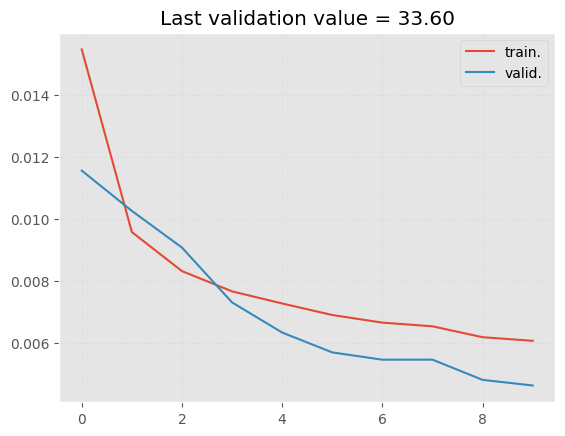

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0074 - mean_absolute_error: 0.0530 - val_loss: 0.0046 - val_mean_absolute_error: 0.0473 - learning_rate: 5.0000e-04
Epoch 11/20
1245/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0519

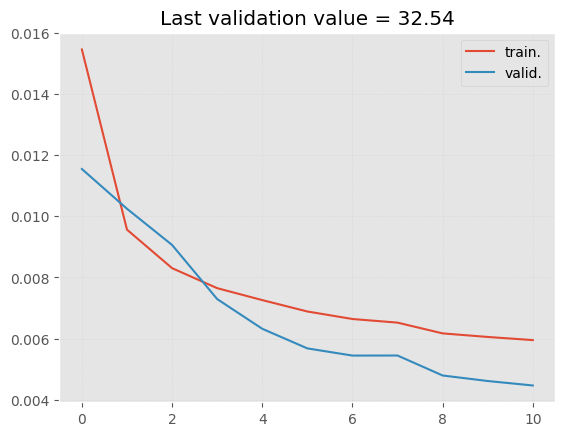

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0518 - val_loss: 0.0045 - val_mean_absolute_error: 0.0464 - learning_rate: 5.0000e-04
Epoch 12/20
1245/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0507

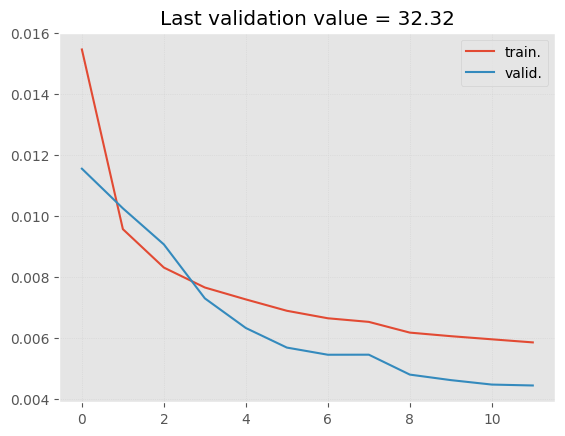


Epoch 12: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0070 - mean_absolute_error: 0.0506 - val_loss: 0.0044 - val_mean_absolute_error: 0.0464 - learning_rate: 5.0000e-04
Epoch 13/20
1249/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mean_absolute_error: 0.0492

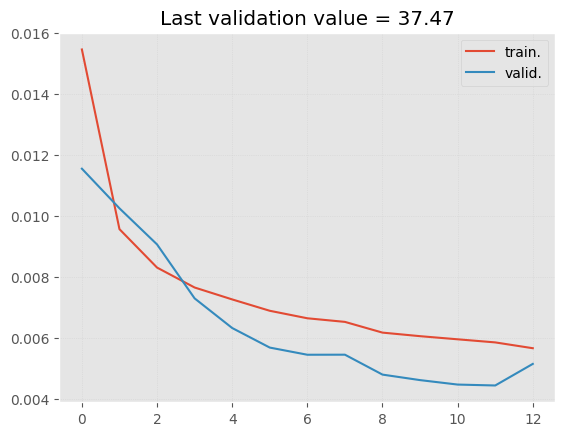


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0068 - mean_absolute_error: 0.0492 - val_loss: 0.0051 - val_mean_absolute_error: 0.0521 - learning_rate: 2.5000e-04
Epoch 14/20
1246/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0473

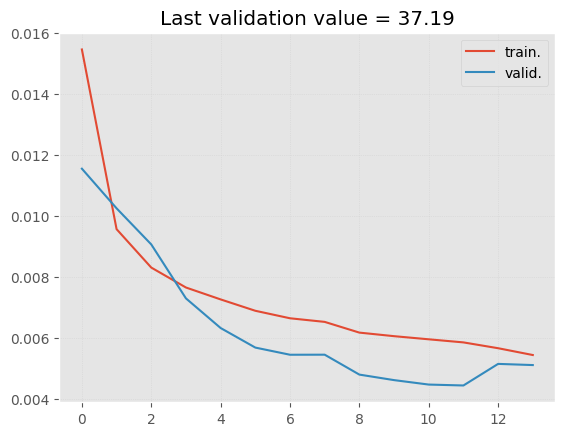


Epoch 14: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0064 - mean_absolute_error: 0.0473 - val_loss: 0.0051 - val_mean_absolute_error: 0.0523 - learning_rate: 1.2500e-04
CPU times: user 2min 54s, sys: 22.8 s, total: 3min 17s
Wall time: 3min 17s


In [79]:
%%time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# ... (other imports and code) ...

class PlotMetrics(tf.keras.callbacks.Callback):
    def __init__(self, model_label, log_dict):
        super(PlotMetrics, self).__init__()
        self.model_label = model_label
        self.log_dict = log_dict
        self.train_losses = []
        self.val_losses = []

    def on_epoch_end(self, epoch, logs):
        train_loss = logs['loss']
        val_loss = logs['val_loss']
        self.train_losses.append(train_loss)
        self.val_losses.append(val_loss)

        N = np.arange(0, len(self.train_losses))
        plt.style.use("ggplot")
        plt.figure()
        plt.plot(N, self.train_losses, label='train.')
        plt.plot(N, self.val_losses, label='valid.')
        plt.grid(color='lightgrey', linestyle=':', linewidth=0.5)

        # Change np.float to float
        val_denorm = float(my_scaler_tv.inverse_transform(np.array([[val_loss]])))

        plt.title(f'Last validation value = {val_denorm:.2f}')
        plt.legend(loc='upper right')
        plt.show()


def compile_and_fit(model, window, patience=2, max_epochs=20, model_label=None, log_dict=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    plot_metrics = PlotMetrics(model_label, log_dict)

    # Reduce learning rate on plateau
    rlr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1,
                                               mode='min', min_delta=0.0001, cooldown=0, min_lr=0)

    model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.MeanSquaredError(),
                  metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=max_epochs, validation_data=window.val,
                        callbacks=[plot_metrics, early_stopping, rlr])

    if log_dict:
        # Assuming you are logging relevant metrics here
        log_dict[model_label] = history.history

    return history


# ... (Rest of your code) ...


model_label = 'Dense'
current_window = base_window

dense_model = tf.keras.Sequential([
    layers.Lambda(lambda x: x[:, -1:, :]),
    layers.Dense(512, activation='relu'),
    layers.Dense(OUT_STEPS)
])

history = compile_and_fit(dense_model, current_window,
                          model_label=model_label, log_dict=my_log)

### RNN

Epoch 1/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0344 - mean_absolute_error: 0.1271

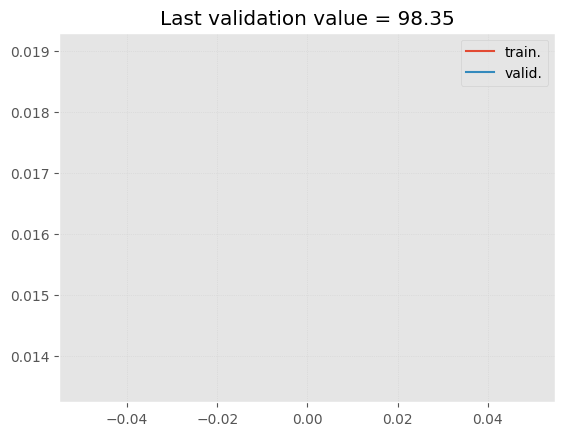

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0344 - mean_absolute_error: 0.1270 - val_loss: 0.0135 - val_mean_absolute_error: 0.0899 - learning_rate: 0.0010
Epoch 2/20
1246/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0144 - mean_absolute_error: 0.0826

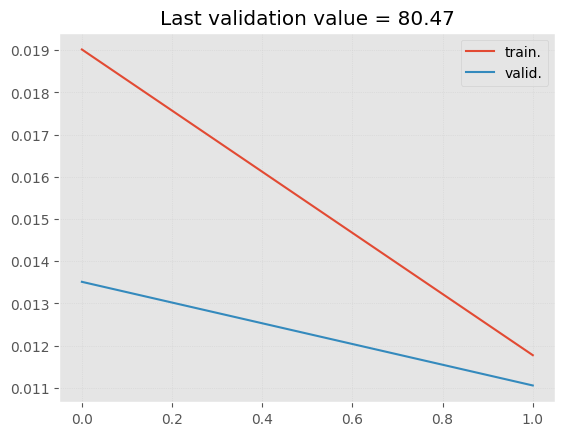

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0144 - mean_absolute_error: 0.0826 - val_loss: 0.0111 - val_mean_absolute_error: 0.0790 - learning_rate: 0.0010
Epoch 3/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0121 - mean_absolute_error: 0.0731

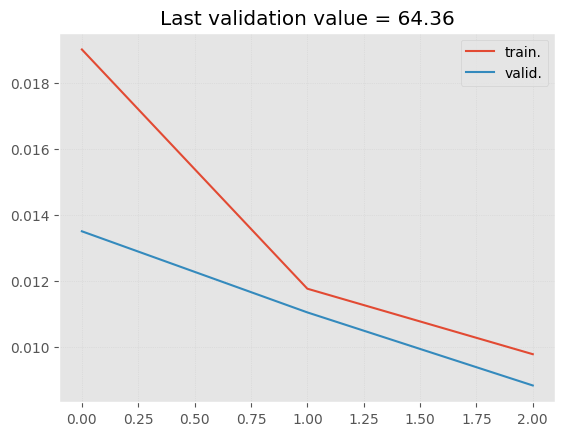

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0121 - mean_absolute_error: 0.0731 - val_loss: 0.0088 - val_mean_absolute_error: 0.0679 - learning_rate: 0.0010
Epoch 4/20
1245/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0102 - mean_absolute_error: 0.0659

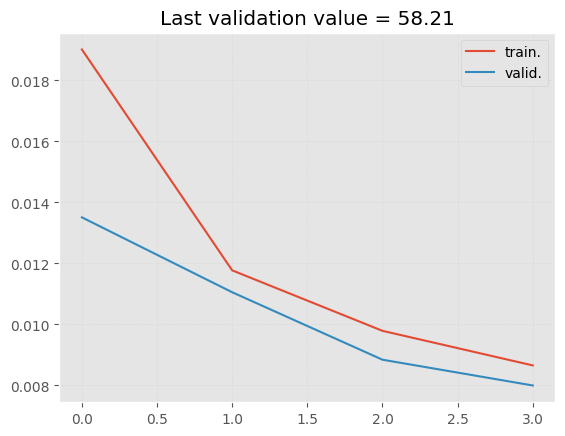

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0102 - mean_absolute_error: 0.0659 - val_loss: 0.0080 - val_mean_absolute_error: 0.0652 - learning_rate: 0.0010
Epoch 5/20
1250/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0093 - mean_absolute_error: 0.0628

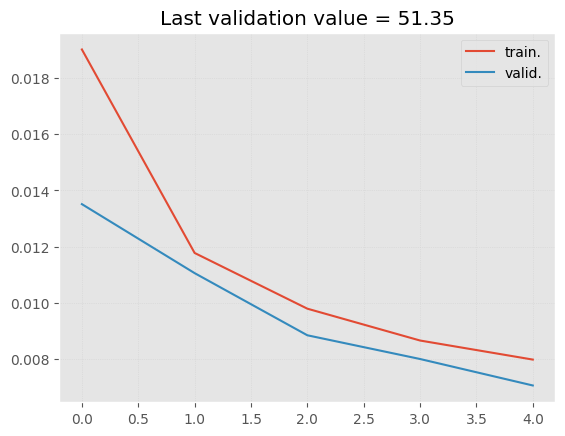

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0093 - mean_absolute_error: 0.0628 - val_loss: 0.0071 - val_mean_absolute_error: 0.0623 - learning_rate: 0.0010
Epoch 6/20
1247/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0083 - mean_absolute_error: 0.0587

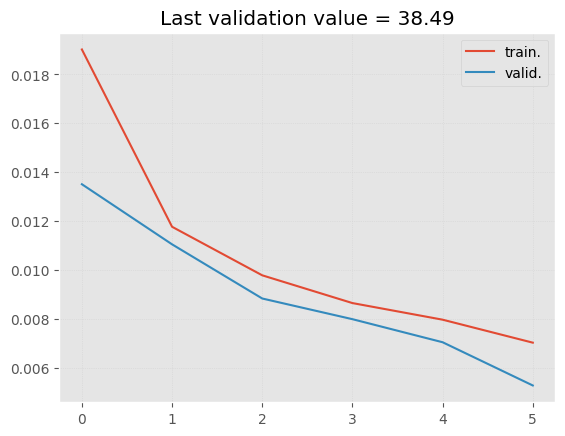

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0587 - val_loss: 0.0053 - val_mean_absolute_error: 0.0527 - learning_rate: 0.0010
Epoch 7/20
1252/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0073 - mean_absolute_error: 0.0531

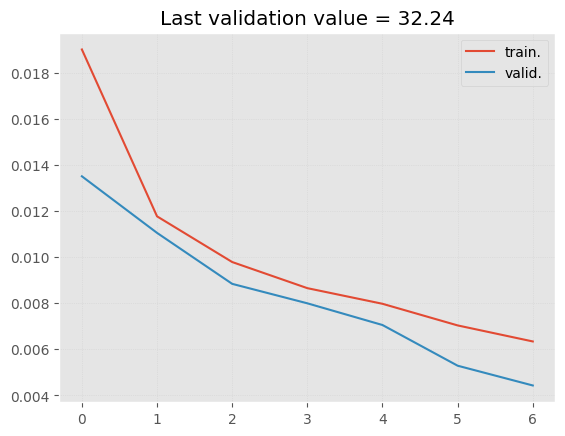

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0073 - mean_absolute_error: 0.0531 - val_loss: 0.0044 - val_mean_absolute_error: 0.0466 - learning_rate: 0.0010
Epoch 8/20
1253/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0068 - mean_absolute_error: 0.0507

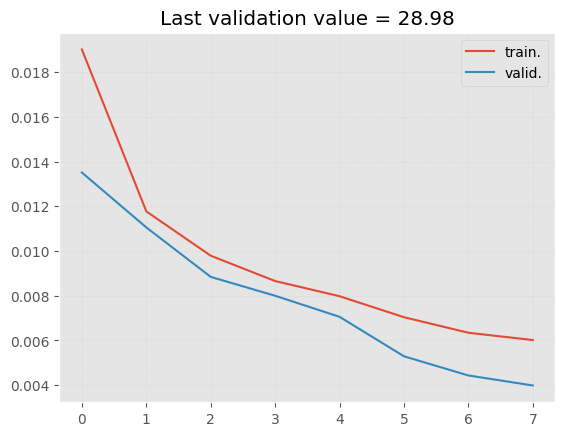

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0068 - mean_absolute_error: 0.0507 - val_loss: 0.0040 - val_mean_absolute_error: 0.0430 - learning_rate: 0.0010
Epoch 9/20
1248/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - mean_absolute_error: 0.0491

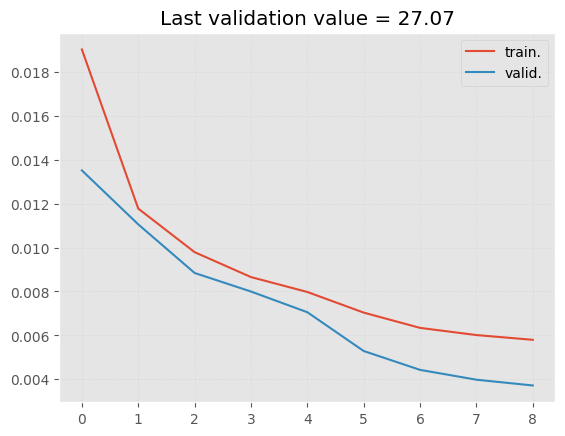

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0066 - mean_absolute_error: 0.0491 - val_loss: 0.0037 - val_mean_absolute_error: 0.0408 - learning_rate: 0.0010
Epoch 10/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0064 - mean_absolute_error: 0.0479

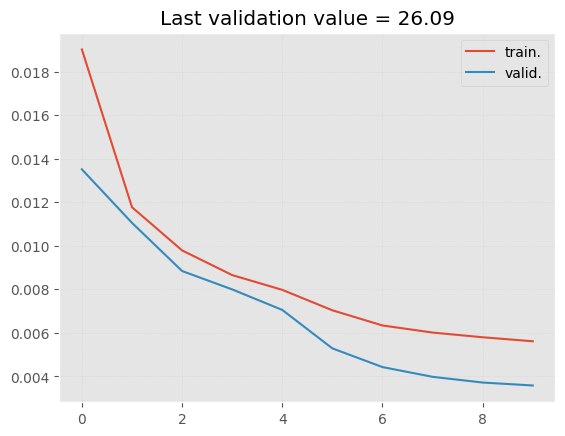

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0064 - mean_absolute_error: 0.0479 - val_loss: 0.0036 - val_mean_absolute_error: 0.0398 - learning_rate: 0.0010
Epoch 11/20
1248/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062 - mean_absolute_error: 0.0468

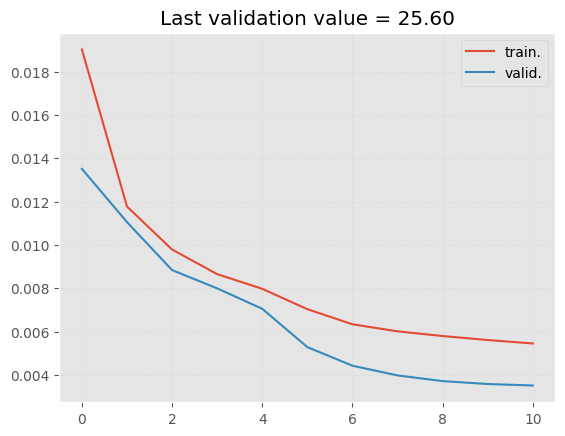


Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - loss: 0.0062 - mean_absolute_error: 0.0468 - val_loss: 0.0035 - val_mean_absolute_error: 0.0394 - learning_rate: 0.0010
Epoch 12/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0059 - mean_absolute_error: 0.0453

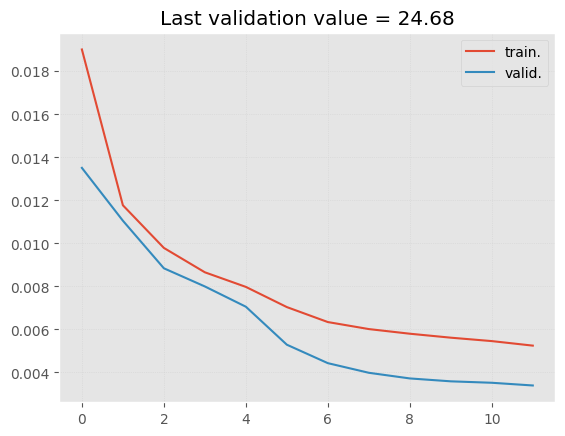

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0059 - mean_absolute_error: 0.0453 - val_loss: 0.0034 - val_mean_absolute_error: 0.0386 - learning_rate: 5.0000e-04
Epoch 13/20
1246/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0057 - mean_absolute_error: 0.0442

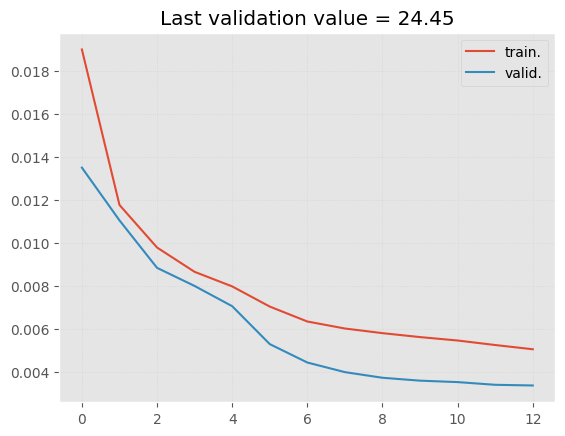


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0057 - mean_absolute_error: 0.0441 - val_loss: 0.0034 - val_mean_absolute_error: 0.0383 - learning_rate: 5.0000e-04
Epoch 14/20
1247/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - mean_absolute_error: 0.0431

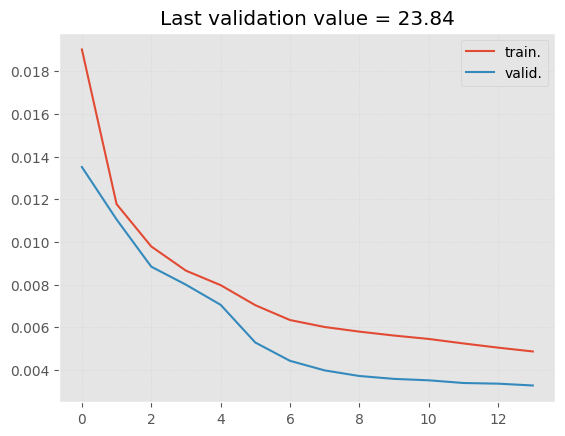

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0431 - val_loss: 0.0033 - val_mean_absolute_error: 0.0376 - learning_rate: 2.5000e-04
Epoch 15/20
1253/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0054 - mean_absolute_error: 0.0421

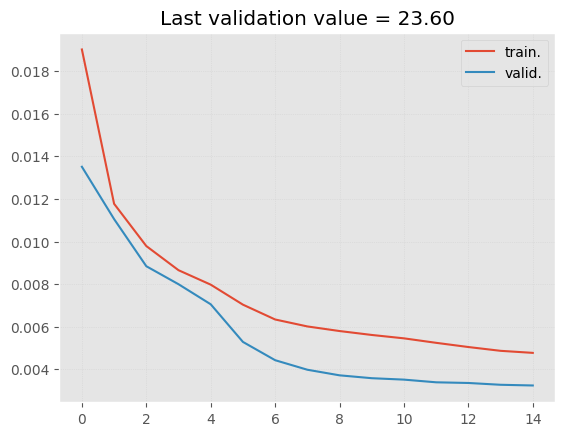


Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0054 - mean_absolute_error: 0.0421 - val_loss: 0.0032 - val_mean_absolute_error: 0.0374 - learning_rate: 2.5000e-04
Epoch 16/20
1248/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0417

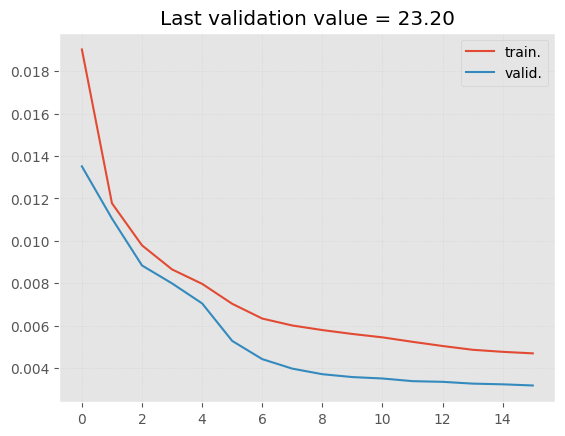


Epoch 16: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0053 - mean_absolute_error: 0.0417 - val_loss: 0.0032 - val_mean_absolute_error: 0.0373 - learning_rate: 1.2500e-04
Epoch 17/20
1252/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0053 - mean_absolute_error: 0.0413

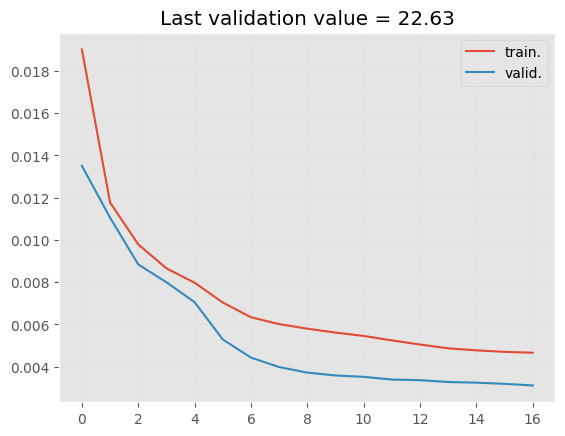

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - loss: 0.0053 - mean_absolute_error: 0.0413 - val_loss: 0.0031 - val_mean_absolute_error: 0.0374 - learning_rate: 6.2500e-05
Epoch 18/20
1249/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0052 - mean_absolute_error: 0.0410

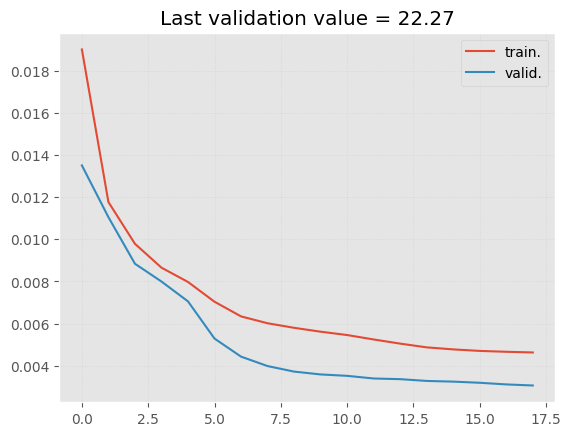


Epoch 18: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.0052 - mean_absolute_error: 0.0410 - val_loss: 0.0031 - val_mean_absolute_error: 0.0367 - learning_rate: 6.2500e-05
Epoch 19/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mean_absolute_error: 0.0410

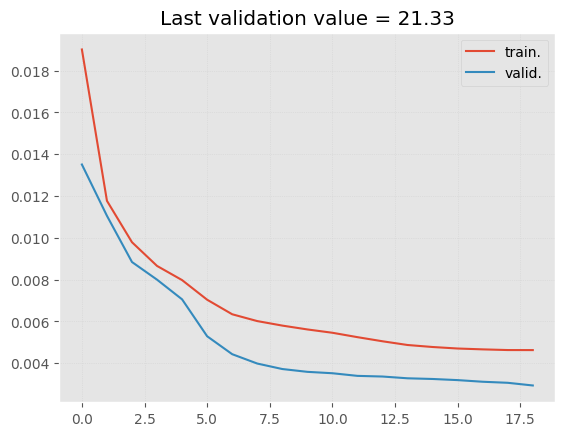

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0052 - mean_absolute_error: 0.0410 - val_loss: 0.0029 - val_mean_absolute_error: 0.0357 - learning_rate: 3.1250e-05
Epoch 20/20
1252/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - mean_absolute_error: 0.0410

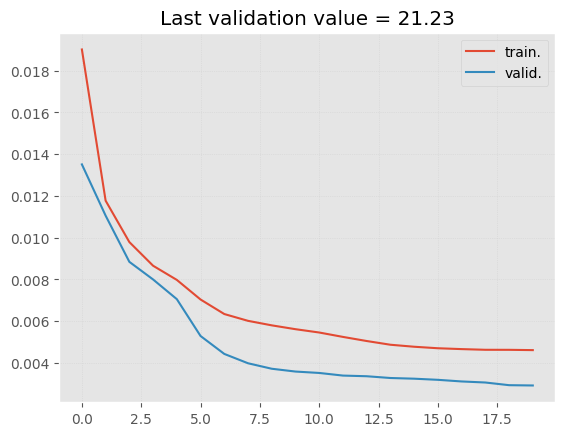


Epoch 20: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0052 - mean_absolute_error: 0.0410 - val_loss: 0.0029 - val_mean_absolute_error: 0.0355 - learning_rate: 3.1250e-05
CPU times: user 5min 37s, sys: 34 s, total: 6min 11s
Wall time: 5min 51s


In [80]:
%%time
model_label = 'LSTM'
current_window = base_window

lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    layers.LSTM(32, return_sequences=False),
    layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros()),
    layers.Dense(OUT_STEPS)
])

history = compile_and_fit(lstm_model, current_window,
                          model_label=model_label, log_dict=my_log)

### My Models

I created another Window Gen to experiment with the batch size in my models

In [81]:
my_window1 = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=32
                               )
print("my_window1", my_window1)

# I created another WindowGen to experiment with the batch size in my models
my_window2 = WindowGenerator(input_width=INPUT_WIDTH,
                               label_width=OUT_STEPS,
                               shift=SHIFT, label_columns=['traffic_volume'],
                               batch_size=64
                               )
print("my_window2", my_window2)

my_window1 Total window size: 8 = 6+(1+1)
Batch size: 32
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']
my_window2 Total window size: 8 = 6+(1+1)
Batch size: 64
Input indices: [0 1 2 3 4 5]
Label indices: [7] start: [7]
Label column name(s): ['traffic_volume']


### Model 1

Epoch 1/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.0305 - mean_absolute_error: 0.1189

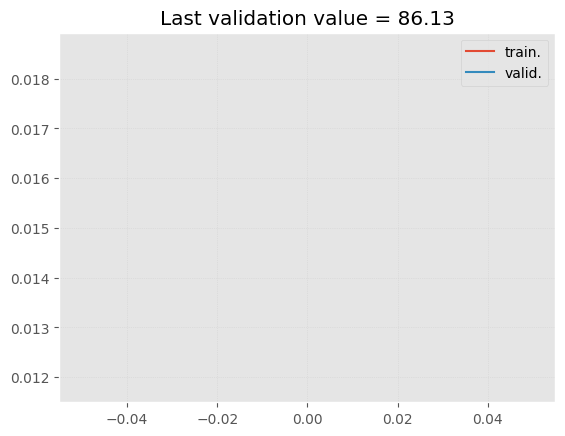

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 338s 265ms/step - loss: 0.0305 - mean_absolute_error: 0.1189 - val_loss: 0.0118 - val_mean_absolute_error: 0.0789 - learning_rate: 0.0010
Epoch 2/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 0.0126 - mean_absolute_error: 0.0711

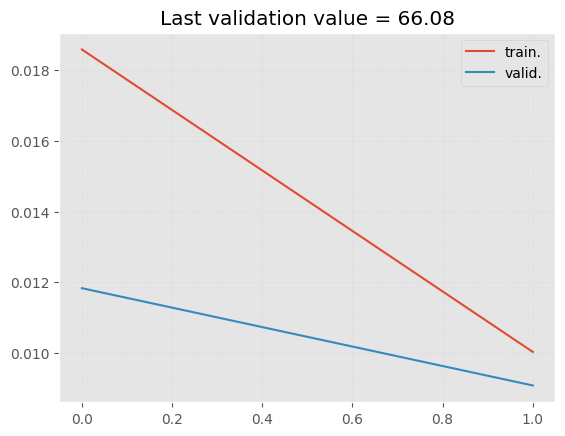

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 329s 262ms/step - loss: 0.0125 - mean_absolute_error: 0.0711 - val_loss: 0.0091 - val_mean_absolute_error: 0.0685 - learning_rate: 0.0010
Epoch 3/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 0.0086 - mean_absolute_error: 0.0564

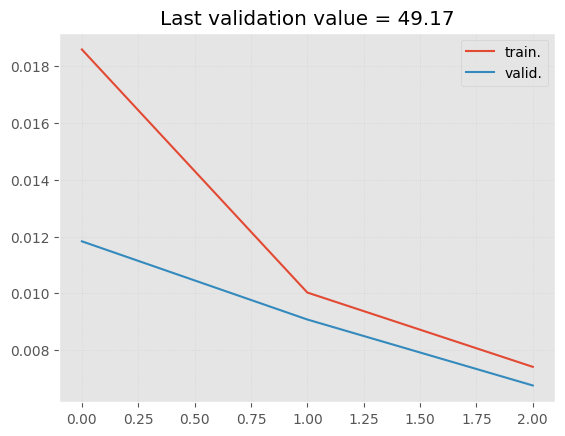

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 391s 269ms/step - loss: 0.0086 - mean_absolute_error: 0.0564 - val_loss: 0.0068 - val_mean_absolute_error: 0.0565 - learning_rate: 0.0010
Epoch 4/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 0.0076 - mean_absolute_error: 0.0523

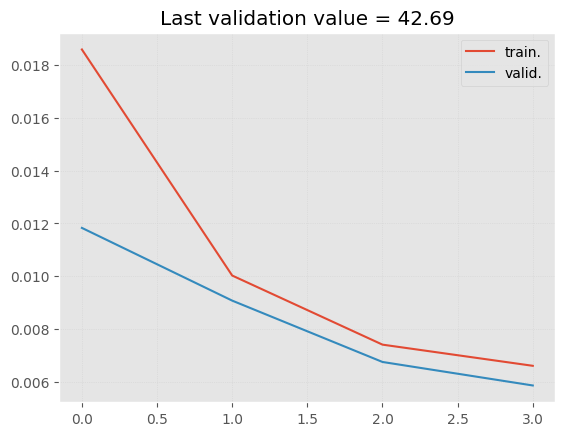

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 379s 267ms/step - loss: 0.0076 - mean_absolute_error: 0.0523 - val_loss: 0.0059 - val_mean_absolute_error: 0.0531 - learning_rate: 0.0010
Epoch 5/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 0.0072 - mean_absolute_error: 0.0512

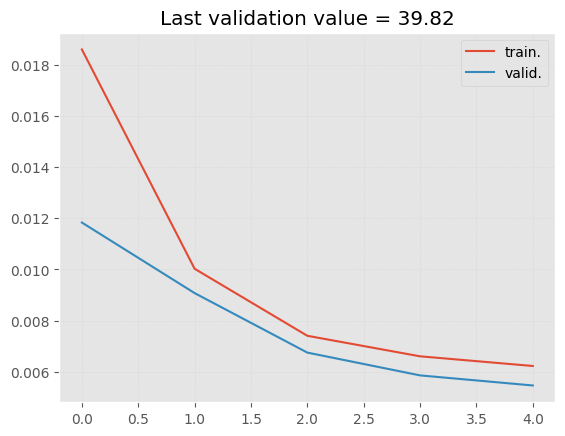

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 370s 257ms/step - loss: 0.0072 - mean_absolute_error: 0.0512 - val_loss: 0.0055 - val_mean_absolute_error: 0.0511 - learning_rate: 0.0010
Epoch 6/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - loss: 0.0068 - mean_absolute_error: 0.0493

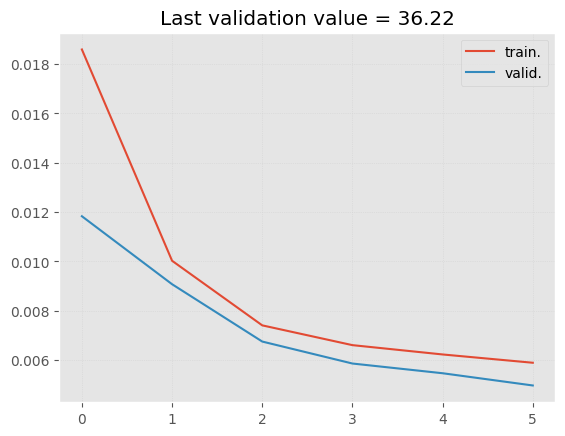

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 331s 264ms/step - loss: 0.0068 - mean_absolute_error: 0.0493 - val_loss: 0.0050 - val_mean_absolute_error: 0.0489 - learning_rate: 0.0010
Epoch 7/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 0.0066 - mean_absolute_error: 0.0485

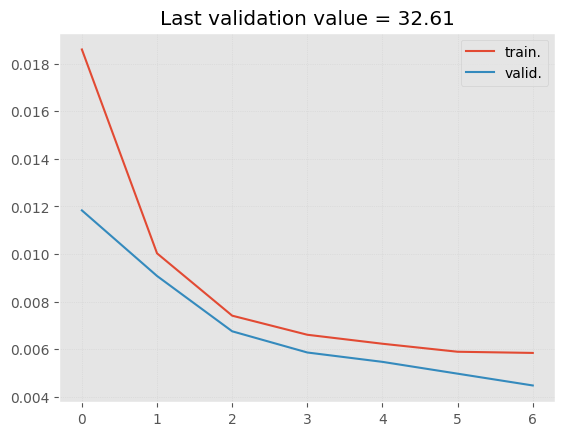

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 338s 270ms/step - loss: 0.0066 - mean_absolute_error: 0.0485 - val_loss: 0.0045 - val_mean_absolute_error: 0.0460 - learning_rate: 0.0010
Epoch 8/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 0.0062 - mean_absolute_error: 0.0467

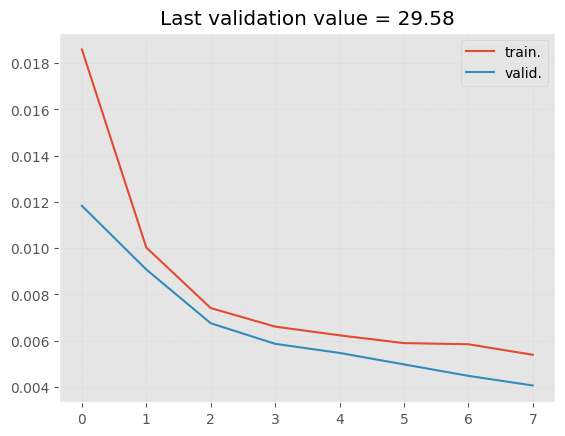

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 339s 271ms/step - loss: 0.0062 - mean_absolute_error: 0.0467 - val_loss: 0.0041 - val_mean_absolute_error: 0.0438 - learning_rate: 0.0010
Epoch 9/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0061 - mean_absolute_error: 0.0461

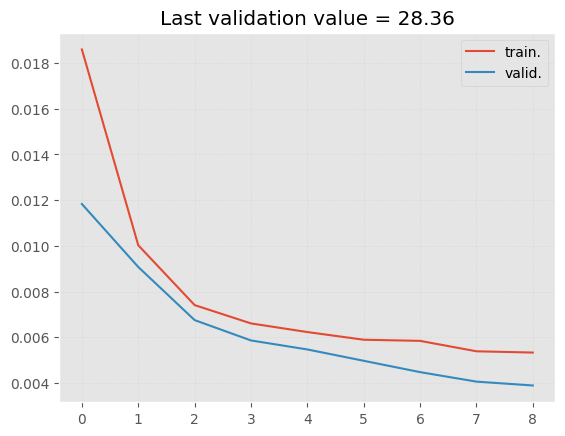

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 375s 265ms/step - loss: 0.0061 - mean_absolute_error: 0.0461 - val_loss: 0.0039 - val_mean_absolute_error: 0.0424 - learning_rate: 0.0010
Epoch 10/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 0.0058 - mean_absolute_error: 0.0448

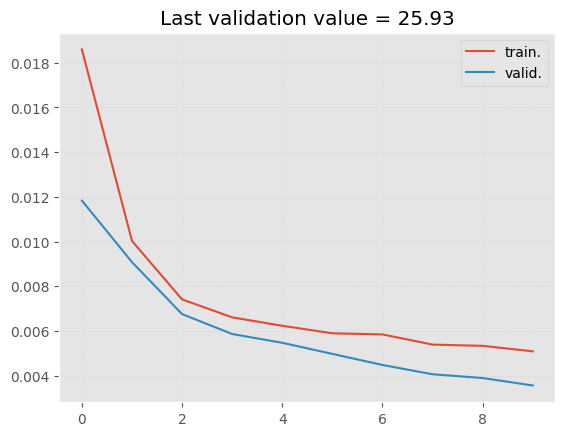

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 381s 265ms/step - loss: 0.0058 - mean_absolute_error: 0.0448 - val_loss: 0.0036 - val_mean_absolute_error: 0.0403 - learning_rate: 0.0010
Epoch 11/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0057 - mean_absolute_error: 0.0443

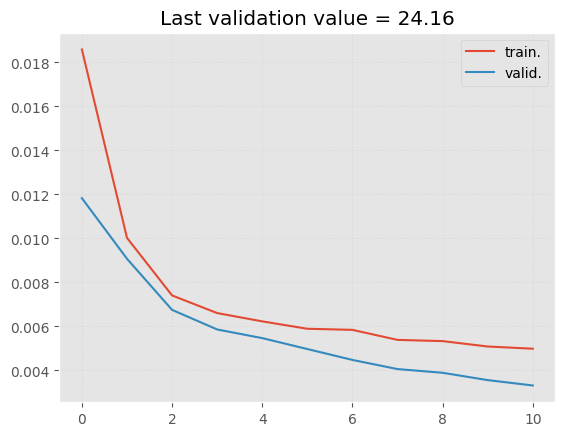

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 390s 272ms/step - loss: 0.0057 - mean_absolute_error: 0.0443 - val_loss: 0.0033 - val_mean_absolute_error: 0.0385 - learning_rate: 0.0010
Epoch 12/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - loss: 0.0055 - mean_absolute_error: 0.0430

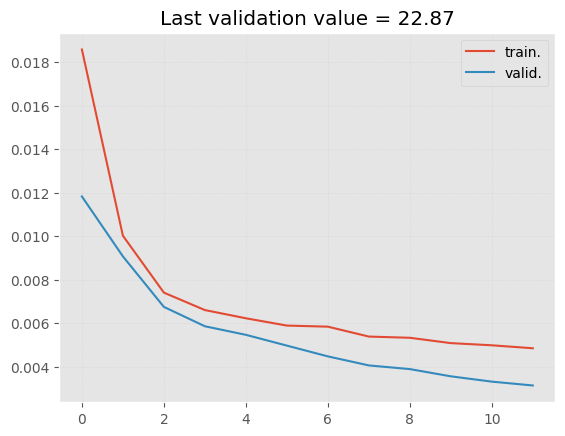

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 381s 271ms/step - loss: 0.0055 - mean_absolute_error: 0.0430 - val_loss: 0.0031 - val_mean_absolute_error: 0.0370 - learning_rate: 0.0010
Epoch 13/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - loss: 0.0054 - mean_absolute_error: 0.0426

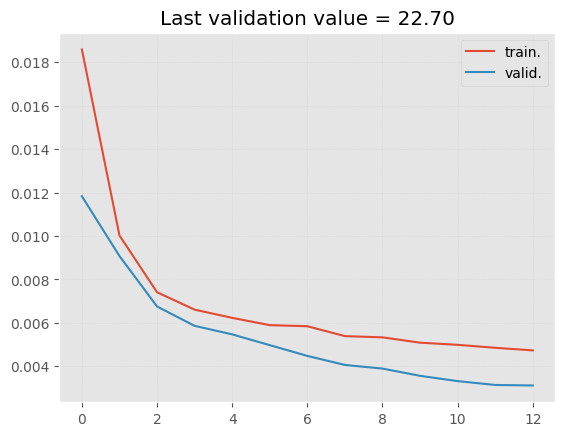


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 376s 266ms/step - loss: 0.0054 - mean_absolute_error: 0.0426 - val_loss: 0.0031 - val_mean_absolute_error: 0.0366 - learning_rate: 0.0010
Epoch 14/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - loss: 0.0050 - mean_absolute_error: 0.0399

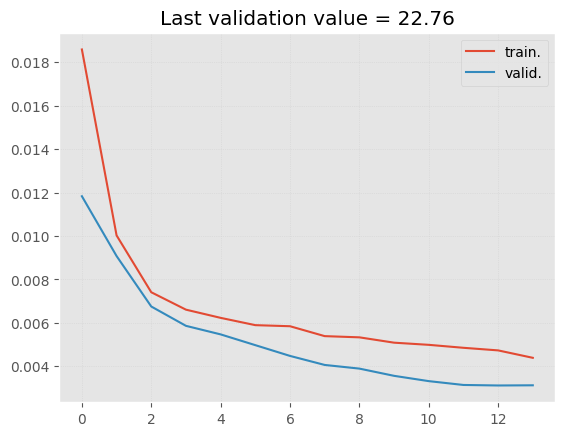


Epoch 14: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 335s 267ms/step - loss: 0.0050 - mean_absolute_error: 0.0399 - val_loss: 0.0031 - val_mean_absolute_error: 0.0366 - learning_rate: 5.0000e-04
Epoch 15/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 0.0047 - mean_absolute_error: 0.0387

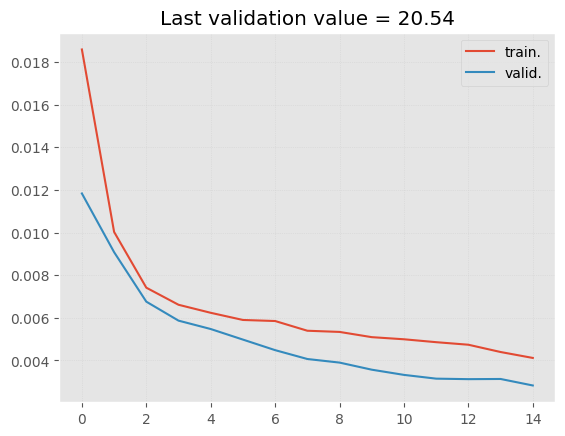

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 383s 268ms/step - loss: 0.0047 - mean_absolute_error: 0.0387 - val_loss: 0.0028 - val_mean_absolute_error: 0.0345 - learning_rate: 2.5000e-04
Epoch 16/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 0.0045 - mean_absolute_error: 0.0380

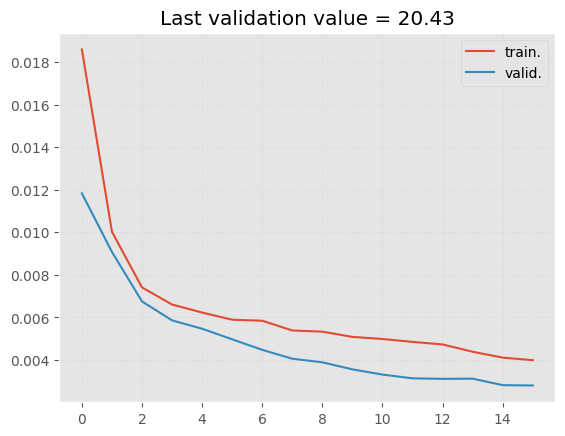


Epoch 16: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 325s 259ms/step - loss: 0.0045 - mean_absolute_error: 0.0380 - val_loss: 0.0028 - val_mean_absolute_error: 0.0345 - learning_rate: 2.5000e-04
Epoch 17/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.0044 - mean_absolute_error: 0.0373

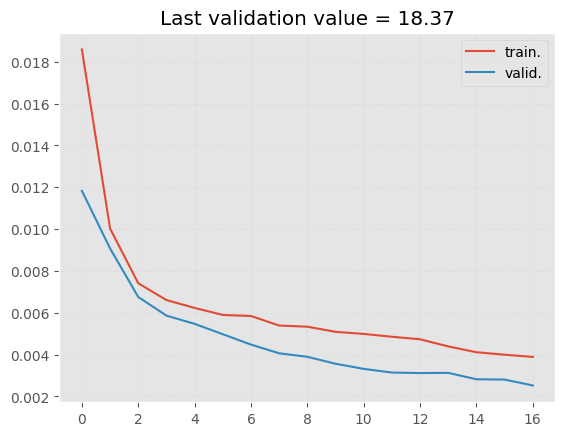

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 324s 259ms/step - loss: 0.0044 - mean_absolute_error: 0.0373 - val_loss: 0.0025 - val_mean_absolute_error: 0.0334 - learning_rate: 1.2500e-04
Epoch 18/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - loss: 0.0043 - mean_absolute_error: 0.0366

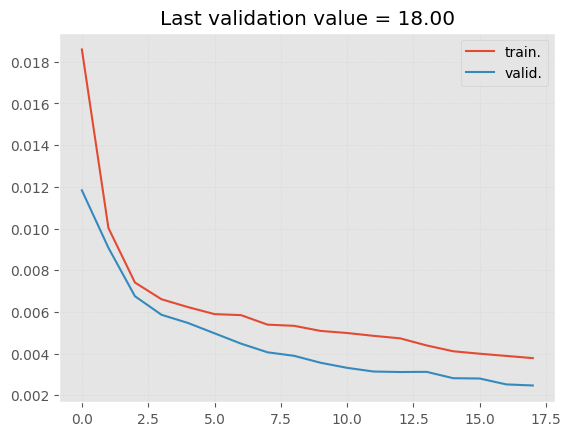


Epoch 18: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 324s 258ms/step - loss: 0.0043 - mean_absolute_error: 0.0366 - val_loss: 0.0025 - val_mean_absolute_error: 0.0330 - learning_rate: 1.2500e-04
Epoch 19/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: 0.0042 - mean_absolute_error: 0.0361

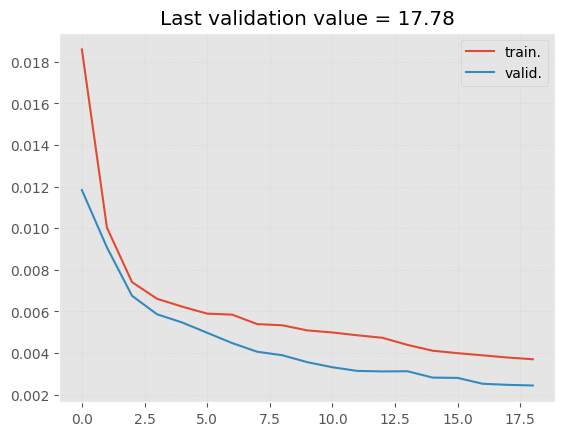


Epoch 19: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 383s 260ms/step - loss: 0.0042 - mean_absolute_error: 0.0361 - val_loss: 0.0024 - val_mean_absolute_error: 0.0331 - learning_rate: 6.2500e-05
Epoch 20/20
1254/1254 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 0.0042 - mean_absolute_error: 0.0359

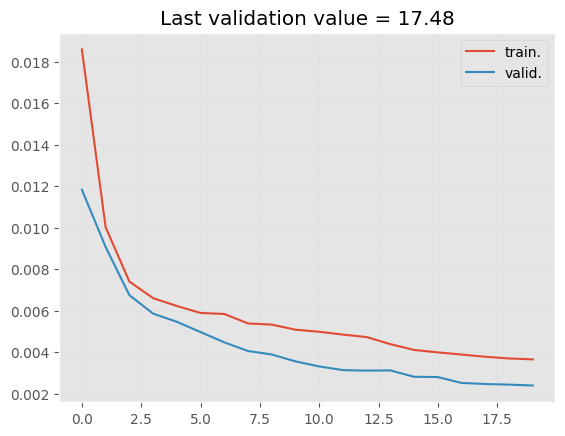

1254/1254 ━━━━━━━━━━━━━━━━━━━━ 337s 269ms/step - loss: 0.0042 - mean_absolute_error: 0.0359 - val_loss: 0.0024 - val_mean_absolute_error: 0.0328 - learning_rate: 3.1250e-05
CPU times: user 2h 53min 47s, sys: 4min 3s, total: 2h 57min 51s
Wall time: 1h 59min 36s


In [82]:
%%time
model_label = 'MyLSTM_1'
current_window = my_window1

my_lstm_model = tf.keras.Sequential([
    layers.LSTM(512, return_sequences=True),
    layers.LSTM(512, return_sequences=False),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(OUT_STEPS)
])

history = compile_and_fit(my_lstm_model, current_window,
                          model_label=model_label, log_dict=my_log,
                          )

### Performance comparision

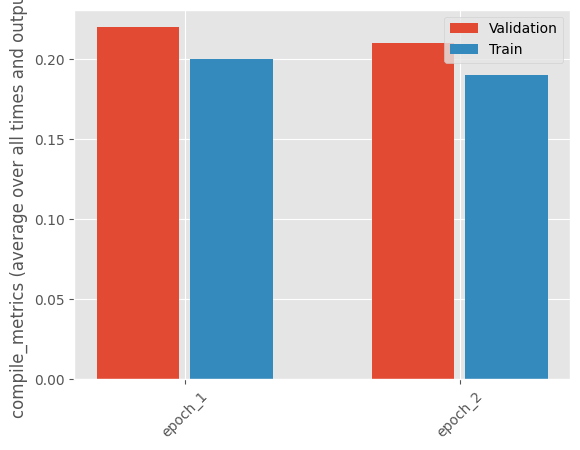

In [90]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'compile_metrics'
metric_index = my_lstm_model.metrics_names.index(metric_name)
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Train')
plt.xticks(ticks=x, labels=multi_performance.keys(), rotation=45)
plt.ylabel(f'{metric_name} (average over all times and outputs)')
_ = plt.legend()

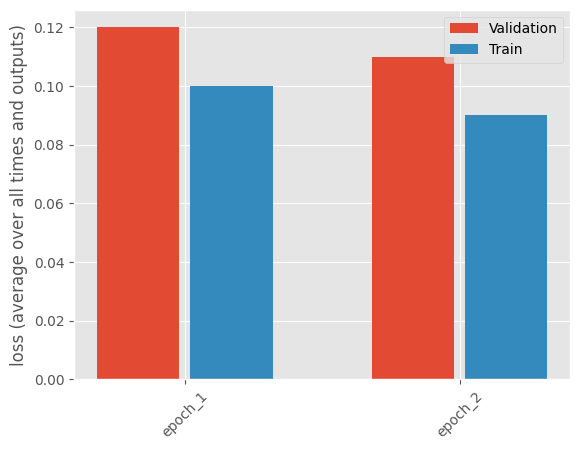

In [91]:
x = np.arange(len(multi_performance))
width = 0.3

metric_name = 'loss'
metric_index = my_lstm_model.metrics_names.index(metric_name)
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Train')
plt.xticks(ticks=x, labels=multi_performance.keys(), rotation=45)
plt.ylabel(f'{metric_name} (average over all times and outputs)')
_ = plt.legend()

### Test Result and Analysis:

The Metro Interstate Traffic Volume Data Set contains hourly traffic volume data for the Westbound lane of Interstate 94, recorded by MN DoT ATR station 301, located approximately between Minneapolis and St. Paul, MN. The dataset also includes hourly weather data and holiday information to assess their influence on traffic patterns. The primary objective was to develop a multi-step RNN model utilizing LSTM that predicts traffic volume 2 hours ahead, based on the past 6-hour data. This is illustrated in (Figure), where the input consists of traffic data from the previous 6 hours, and the label corresponds to the predicted traffic volume for the following 2 hours.

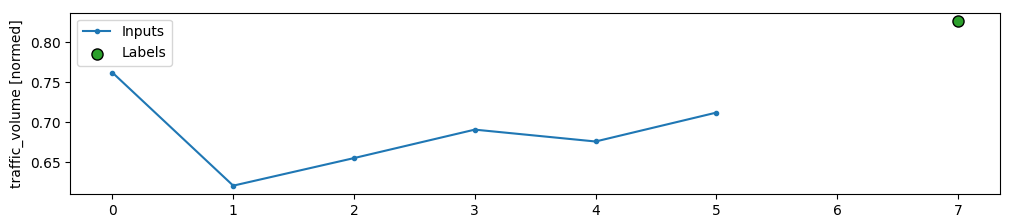


During the initial data processing, we discovered around 7,629 duplicate hourly entries in the dataset, meaning the traffic volume was recorded multiple times for the same day and hour. Although we were aware of this issue initially, we chose to treat the dataset as individual hourly records rather than a time-series with an indexed time unit. However, this approach resulted in relatively modest validation outcomes, with a MAE in the mid-300s. Later, we decided to properly preprocess the data as a time-series indexed at 1-hour intervals, which significantly improved the validation results, lowering the MAE to the low 200s. Subsequently, we divided the data into training, validation, and test sets to ensure the records were correctly assigned to their respective datasets. Additionally, during data preprocessing, we identified missing data between 2014 and 2015 (spanning 10 months), which impacted the validation records, as a noticeable gap in the data was observed, as shown in the figure below.

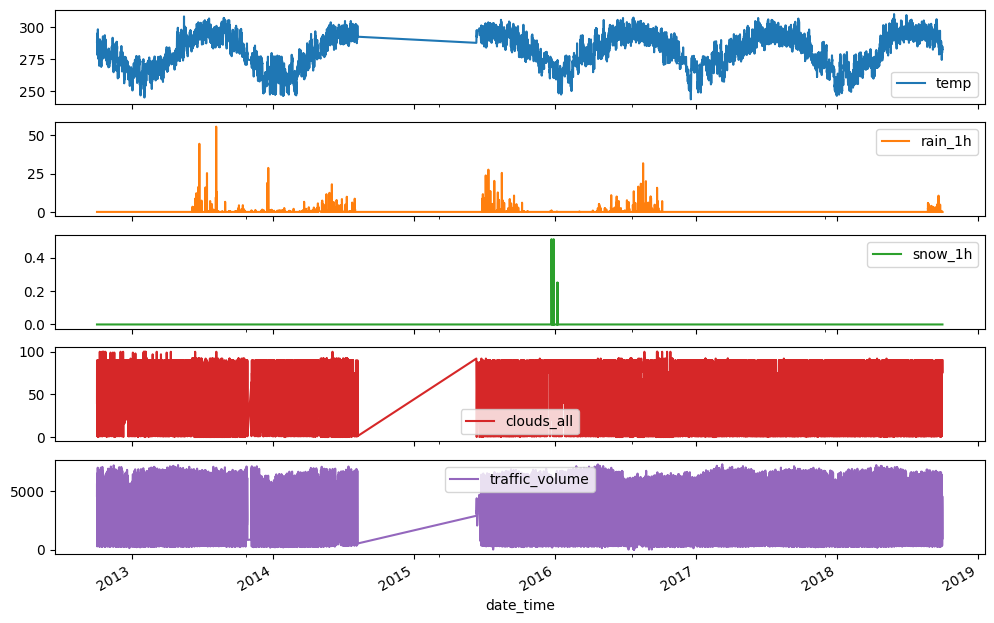


We used neural networks to deal with it and for the outliers that were obsereved in few of the records e.g two days had the temperature field set at zero, which didn't seem right, we fixed it by setting the missing values with the temperature average of each day.

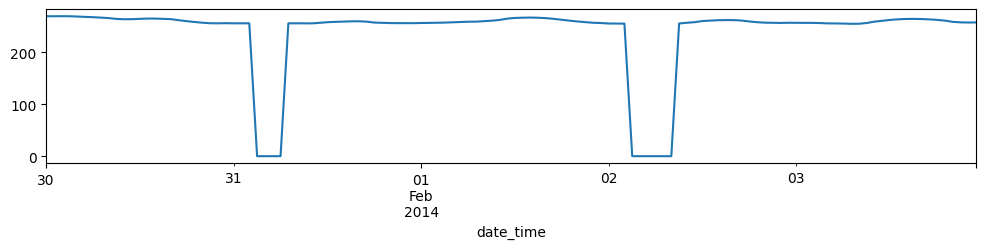




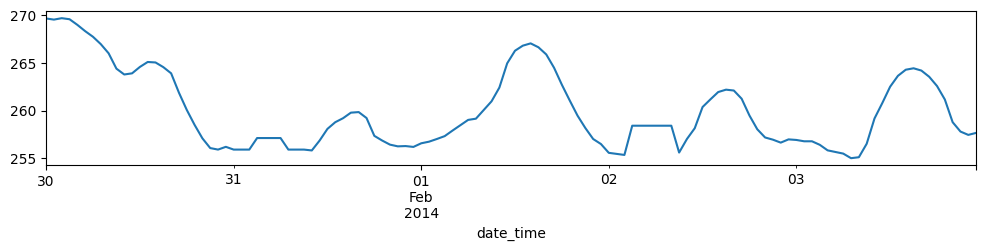

The "Rain" feature contained a single extreme value, which we replaced with the mean value for that specific day. The "Snow" feature also had extreme values, but we couldn't conclusively identify them as outliers, as it might have been an unusually harsh winter. Since we were unfamiliar with the weather conditions in the area, we chose to leave these values unchanged.

During feature engineering and data transformation, we decided to one-hot encode the "weather_main" variable and drop "weather_description," as it provided redundant information. We also determined that the key information to capture was whether the day was a holiday or a weekend, without needing to specify the exact holiday. Thus, we created a new feature called "is_holiday" and removed the old "holiday" feature. Similarly, we created the "is_weekend" feature since we didn't need to track the specific weekend.

We transformed the "date_time" field using sine and cosine functions to capture "Time of day" and "Time of year" signals, allowing the model to access the most relevant frequency features. Lastly, we extracted additional components from the "date_time" field, including day of the week, day, month, year, and day-hour. As a result, we expanded the dataset to 27 features, up from the original 9.

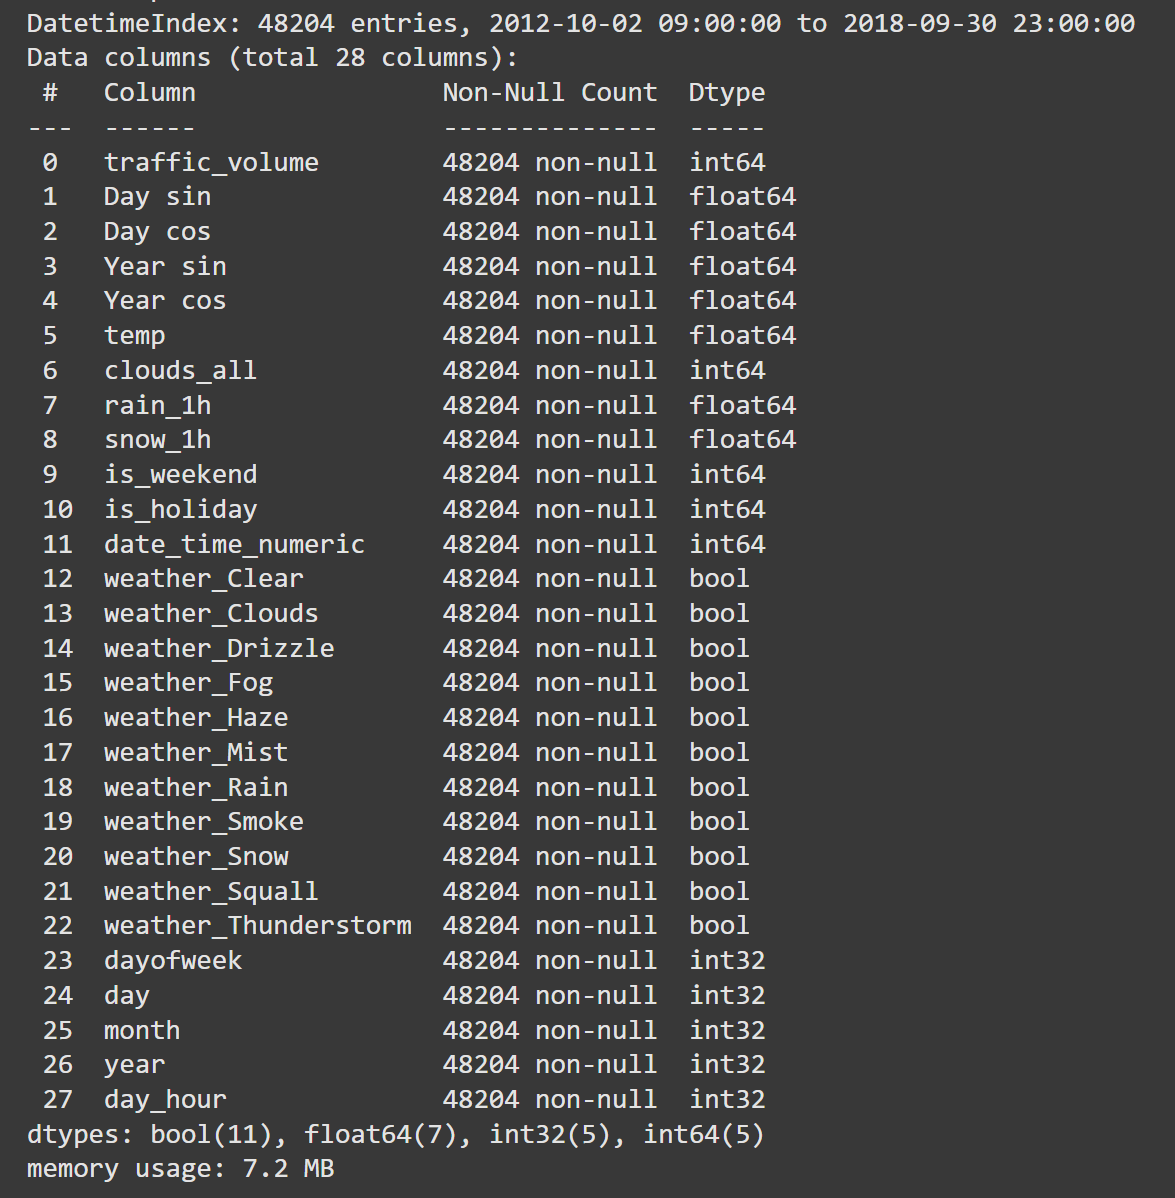

n the time series index resampling phase, we addressed the issue of the 7,629 duplicate hourly entries by resampling the data to a 1-hour interval, ensuring that each record represented only one hour. The duplicate entries were averaged within their respective hours. This transformation was applied after splitting the dataset into training, validation, and testing sets. We found that Min-Max normalization produced better results compared to standard scaling.

During the experiments, our main goal was to evaluate how adjusting each hyperparameter individually impacted the performance of the RNN and LSTM models. We chose not to rely on automated hyperparameter search methods in order to gain a deeper understanding of how each hyperparameter influenced the model's behavior. Given the considerable time spent on data preprocessing, we had to use quick, less-refined methods to better grasp how LSTM networks functioned.

Instead of using automated, systematic hyperparameter evaluation, we opted for a manual testing approach, experimenting with both extremely small and large values for the number of LSTM units. We also incorporated different layer types, such as Convolutional, Dense, GRU, and Bi-directional layers, and tried various batch sizes. From there, we mixed and matched our observations based on the effects of layers and hyperparameters on the models.

While we attempted to find established LSTM model architectures similar to the ones we discovered for Convolutional Neural Networks, we could only find references for basic LSTM layers. The hyperparameters that we systematically tested with different values included:

Number of LSTM units and layers, as well as Dense units in the final layers (Model 1)

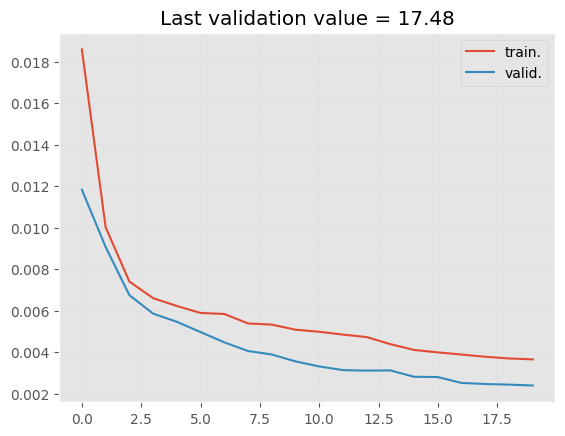

### Conclusion:

- The Bi-Directional LSTM model delivered the best performance with the lowest variance.
- Increasing the depth of the LSTM networks didn’t lead to better results, but increasing the number of LSTM units did make a noticeable difference.
- While LSTM and GRU are generally useful for addressing the Vanishing Gradient Descent problem in deeper networks, we didn’t see any significant improvement from building deeper networks. It’s possible that I wasn't patient enough during this phase.
- Interestingly, models with fewer LSTM units tended to avoid overfitting and showed better validation scores compared to their training scores.